# Private Macro Model - MAX

## Introduction
The goal of the model is to predict the rate of provision for credit losses as a function of economic variables.

After the meeting on 31.8.22, we decided to test an objective dependent variable.

On Lena's recommendation, I took 'problematic credit'.
In this case, it should be noted that is no data before 2012 cause a new regulation in ISRAEL BANK.

So the Data frequency is quarterly, between Q4/2012 - Q3/2022.

On 08/11/2022 we implement the validation comments that we get for development.

The comments included: using the difference as variable in prime and unemployment.

### good luck

# This model predict the rate of problematic credit with all features.

### Import libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=30,5
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Import


In [85]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_private_sector_all_feature.csv')
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
0,31/03/1999,Mar-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.016927,NaN,NaN,NaN
1,30/06/1999,Jun-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.010608,NaN,NaN,NaN,0.016161,NaN,NaN,NaN
2,30/09/1999,Sep-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.012405,0.012405,NaN,NaN,0.015780,NaN,NaN,NaN
3,31/12/1999,Dec-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.335775,NaN,0.004713,0.004713,0.027965,NaN,0.015710,0.016848,NaN,NaN
4,31/03/2000,03/00,NaN,NaN,NaN,516.55,NaN,NaN,NaN,NaN,...,74.113686,73.335775,-0.012195,-0.012195,0.004771,0.015429,0.015084,0.018150,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,30/06/2021,Jun-21,NaN,NaN,0.060400,1764.58,1664.07,1568.09,1345.44,1325.23,...,99.800596,99.700895,0.007952,0.007952,0.016026,0.017042,0.019770,0.018785,0.016208,-0.001034
90,30/09/2021,Sep-21,NaN,NaN,0.053894,1859.68,1764.58,1664.07,1568.09,1345.44,...,99.800596,99.800596,0.008876,0.008876,0.025044,0.025044,0.017995,0.017661,0.015806,-0.000402
91,31/12/2021,Dec-21,NaN,NaN,0.105841,2056.51,1859.68,1764.58,1664.07,1568.09,...,100.600000,99.800596,0.002933,0.002933,0.019881,0.028050,0.016683,0.016957,0.015577,-0.000229
92,31/03/2022,Mar-22,NaN,NaN,0.019742,2097.11,2056.51,1859.68,1764.58,1664.07,...,101.400000,100.600000,0.014620,0.014620,0.026627,0.034791,0.017111,0.018837,0.014547,-0.001030


In [86]:
# Cutting relevant rows
df = df[55:85]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
55,31/12/2012,12-Dec,1073.471818,0.0,-0.005234,1049.06,1054.58,969.86,1032.48,978.49,...,97.110449,96.738379,-0.004708,-0.004708,0.012452,0.016346,0.019968,0.013967,0.018890,NaN
56,31/03/2013,Mar-13,1101.886111,0.0,0.048596,1100.04,1049.06,1054.58,969.86,1032.48,...,97.668555,97.110449,0.000246,0.000246,0.006914,0.012701,0.019109,0.012534,0.018221,-0.000669
57,30/06/2013,Jun-13,1094.010952,-1.0,-0.025990,1071.45,1100.04,1049.06,1054.58,969.86,...,98.784767,97.668555,0.012935,0.012935,0.008414,0.019939,0.019163,0.012197,0.017268,-0.000953
58,30/09/2013,Sep-13,1108.793750,0.0,0.066321,1142.51,1071.45,1100.04,1049.06,1054.58,...,98.319679,98.784767,0.004912,0.004912,0.018161,0.013367,0.019268,0.011826,0.016352,-0.000916
59,31/12/2013,Dec-13,1207.807826,0.0,0.057050,1207.69,1142.51,1071.45,1100.04,1049.06,...,98.343868,98.319679,0.000000,0.000000,0.017910,0.018161,0.018779,0.011686,0.016416,0.000064
60,31/03/2014,Mar-14,1273.445238,0.0,0.062218,1282.83,1207.69,1142.51,1071.45,1100.04,...,99.615978,98.343868,-0.004888,-0.004888,0.000000,0.012935,0.017496,0.011405,0.016349,-0.000067
61,30/06/2014,Jun-14,1260.286000,-1.0,-0.023292,1252.95,1282.83,1207.69,1142.51,1071.45,...,100.105251,99.615978,0.004912,0.004912,0.000000,0.004912,0.017934,0.011217,0.015784,-0.000565
62,30/09/2014,Sep-14,1291.975000,0.0,0.042332,1305.99,1252.95,1282.83,1207.69,1142.51,...,100.105251,100.105251,-0.002933,-0.002933,-0.002933,-0.002933,0.017205,0.011255,0.015310,-0.000474
63,31/12/2014,Dec-14,1304.893478,0.0,-0.013063,1288.93,1305.99,1252.95,1282.83,1207.69,...,99.615978,100.105251,0.000980,0.000980,0.002947,-0.001955,0.018194,0.015455,0.015503,0.000193
64,31/03/2015,Mar-15,1386.289048,0.0,0.099579,1417.28,1288.93,1305.99,1252.95,1282.83,...,100.105251,99.615978,-0.012968,-0.012968,-0.014897,-0.010059,0.017351,0.015314,0.015583,0.000080


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 55 to 84
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            30 non-null     object 
 1   Quarter          30 non-null     object 
 2   TA125            30 non-null     float64
 3   D3-125           30 non-null     float64
 4   P-CHANGE125      30 non-null     float64
 5   TA-125-CLOSE     30 non-null     float64
 6   TA125-LAG1       30 non-null     float64
 7   TA125-LAG2       30 non-null     float64
 8   TA125-LAG3       30 non-null     float64
 9   TA125-LAG4       30 non-null     float64
 10  TA125-LAG1-R     30 non-null     float64
 11  TA125-LAG2-R     30 non-null     float64
 12  TA125-LAG3-R     30 non-null     float64
 13  TA125-LAG4-R     30 non-null     float64
 14  UNEMP            30 non-null     float64
 15  UNEMP-LAG1       30 non-null     float64
 16  UNEMP-LAG2       30 non-null     float64
 17  UNEMP-LAG3       

### Exploring & Cleaning Dataset

In [88]:
df.columns

Index(['Index', 'Quarter', 'TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE',
       'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'PROVISION-b',
       'PROVISION-p', 'PRIVATE-P-C-R', 'P-R-OF-C'],
      dtype='object')

In [89]:
df.head()

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
55,31/12/2012,12-Dec,1073.471818,0.0,-0.005234,1049.06,1054.58,969.86,1032.48,978.49,...,97.110449,96.738379,-0.004708,-0.004708,0.012452,0.016346,0.019968,0.013967,0.018890,NaN
56,31/03/2013,Mar-13,1101.886111,0.0,0.048596,1100.04,1049.06,1054.58,969.86,1032.48,...,97.668555,97.110449,0.000246,0.000246,0.006914,0.012701,0.019109,0.012534,0.018221,-0.000669
57,30/06/2013,Jun-13,1094.010952,-1.0,-0.025990,1071.45,1100.04,1049.06,1054.58,969.86,...,98.784767,97.668555,0.012935,0.012935,0.008414,0.019939,0.019163,0.012197,0.017268,-0.000953
58,30/09/2013,Sep-13,1108.793750,0.0,0.066321,1142.51,1071.45,1100.04,1049.06,1054.58,...,98.319679,98.784767,0.004912,0.004912,0.018161,0.013367,0.019268,0.011826,0.016352,-0.000916
59,31/12/2013,Dec-13,1207.807826,0.0,0.057050,1207.69,1142.51,1071.45,1100.04,1049.06,...,98.343868,98.319679,0.000000,0.000000,0.017910,0.018161,0.018779,0.011686,0.016416,0.000064


In [90]:
df.tail()

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
80,31/03/2019,Mar-19,1417.974000,0.0,0.063645,1418.03,1333.18,1484.82,1362.60,1310.48,...,99.997037,99.009900,0.005010,0.005010,0.004018,0.014028,0.014118,0.018299,0.018757,-0.002856
81,30/06/2019,Jun-19,1447.851500,0.0,0.047340,1485.16,1418.03,1333.18,1484.82,1362.60,...,100.194465,99.997037,0.003972,0.003972,0.006020,0.008006,0.014947,0.017195,0.017033,-0.001724
82,30/09/2019,Sep-19,1505.308421,0.0,0.031916,1532.56,1485.16,1418.03,1333.18,1484.82,...,99.898324,100.194465,-0.002967,-0.002967,0.006008,0.003034,0.014715,0.017293,0.017216,0.000183
83,31/12/2019,Dec-19,1612.222174,0.0,0.054902,1616.70,1532.56,1485.16,1418.03,1333.18,...,100.398801,99.898324,0.000000,0.000000,0.000993,0.006008,0.016276,0.017510,0.017668,0.000452
84,31/03/2020,Mar-20,1270.834762,-21.0,-0.210194,1276.88,1616.70,1532.56,1485.16,1418.03,...,100.797605,100.398801,-0.000992,-0.000992,-0.003956,0.000000,0.019475,0.019849,0.018185,0.000517


In [91]:
len(df)

30

In [92]:
df.columns

Index(['Index', 'Quarter', 'TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE',
       'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'PROVISION-b',
       'PROVISION-p', 'PRIVATE-P-C-R', 'P-R-OF-C'],
      dtype='object')

In [93]:
PROVISION_B = pd.DataFrame()
PROVISION_B = df['PROVISION-b']

In [94]:
PROVISION_P = pd.DataFrame()
PROVISION_P = df['PROVISION-p']

### Drop credit balance columns

In [95]:
df = df.drop(labels= ['PROVISION-b','PROVISION-p'], axis= 1)

In [96]:
df = df.drop(labels= ['P-R-OF-C'], axis= 1)

In [97]:
df.columns

Index(['Index', 'Quarter', 'TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE',
       'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'PRIVATE-P-C-R'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 55 to 84
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            30 non-null     object 
 1   Quarter          30 non-null     object 
 2   TA125            30 non-null     float64
 3   D3-125           30 non-null     float64
 4   P-CHANGE125      30 non-null     float64
 5   TA-125-CLOSE     30 non-null     float64
 6   TA125-LAG1       30 non-null     float64
 7   TA125-LAG2       30 non-null     float64
 8   TA125-LAG3       30 non-null     float64
 9   TA125-LAG4       30 non-null     float64
 10  TA125-LAG1-R     30 non-null     float64
 11  TA125-LAG2-R     30 non-null     float64
 12  TA125-LAG3-R     30 non-null     float64
 13  TA125-LAG4-R     30 non-null     float64
 14  UNEMP            30 non-null     float64
 15  UNEMP-LAG1       30 non-null     float64
 16  UNEMP-LAG2       30 non-null     float64
 17  UNEMP-LAG3       

In [99]:
df.describe()

,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,TA125-LAG1-R,TA125-LAG2-R,...,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PRIVATE-P-C-R
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1310.990580,-1.500000,0.008487,1305.857000,1298.447000,1276.885667,1260.216333,1243.327333,0.008487,0.026118,...,99.475892,99.422091,99.327760,99.214825,99.079517,0.000557,0.000557,0.002670,0.004050,0.017421
std,124.985020,4.040741,0.063788,128.567596,136.459214,135.538531,133.749493,136.330203,0.063788,0.070635,...,0.766453,0.756013,0.792734,0.858780,0.918506,0.005789,0.005789,0.007966,0.008735,0.001747
min,1073.471818,-21.000000,-0.210194,1049.060000,1049.060000,969.860000,969.860000,969.860000,-0.210194,-0.166832,...,97.915263,97.915263,97.668555,97.110449,96.738379,-0.012968,-0.012968,-0.018018,-0.010059,0.015218
25%,1265.629870,-1.000000,-0.023854,1251.892500,1250.527500,1220.955000,1208.570000,1158.805000,-0.023854,-0.006415,...,98.913380,98.837699,98.791693,98.731511,98.713757,-0.002950,-0.002950,-0.001015,-0.002704,0.016024
50%,1292.309643,0.000000,0.023073,1290.685000,1290.685000,1288.905000,1285.855000,1282.600000,0.023073,0.030698,...,99.615978,99.464302,99.210620,99.059257,99.009900,0.000000,0.000000,0.002999,0.003517,0.017242
75%,1385.203411,0.000000,0.053325,1363.920000,1363.920000,1355.245000,1328.655000,1313.930000,0.053325,0.081437,...,100.105251,100.078198,99.975163,99.906737,99.876665,0.003729,0.003729,0.007845,0.012517,0.018212
max,1612.222174,0.000000,0.099579,1616.700000,1616.700000,1532.560000,1485.160000,1484.820000,0.099579,0.133035,...,100.797605,100.797605,100.797605,100.797605,100.398801,0.012935,0.012935,0.018161,0.019939,0.021613


# Visualisation of the data

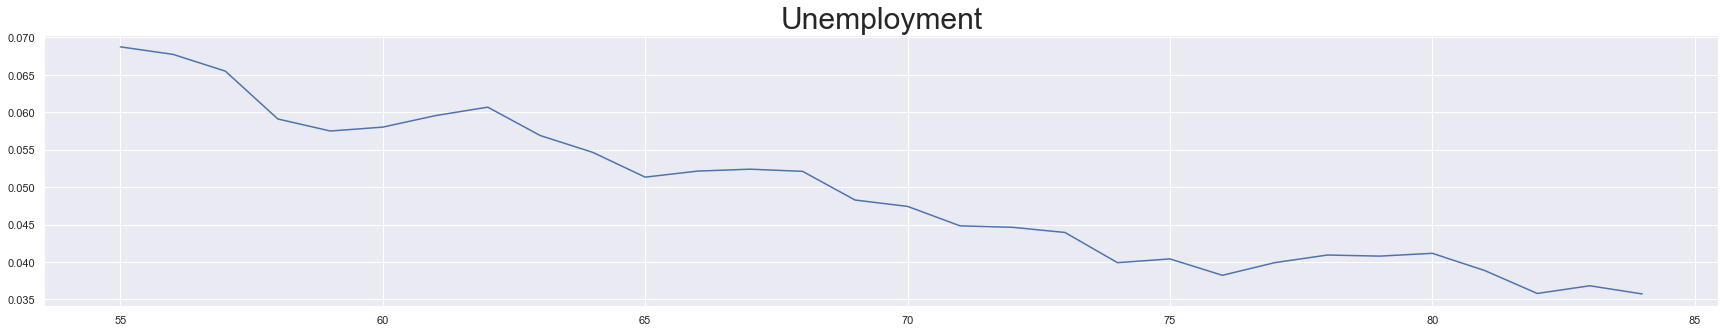

In [100]:
df['UNEMP'].plot()
plt.title('Unemployment',fontdict={'fontsize':30});

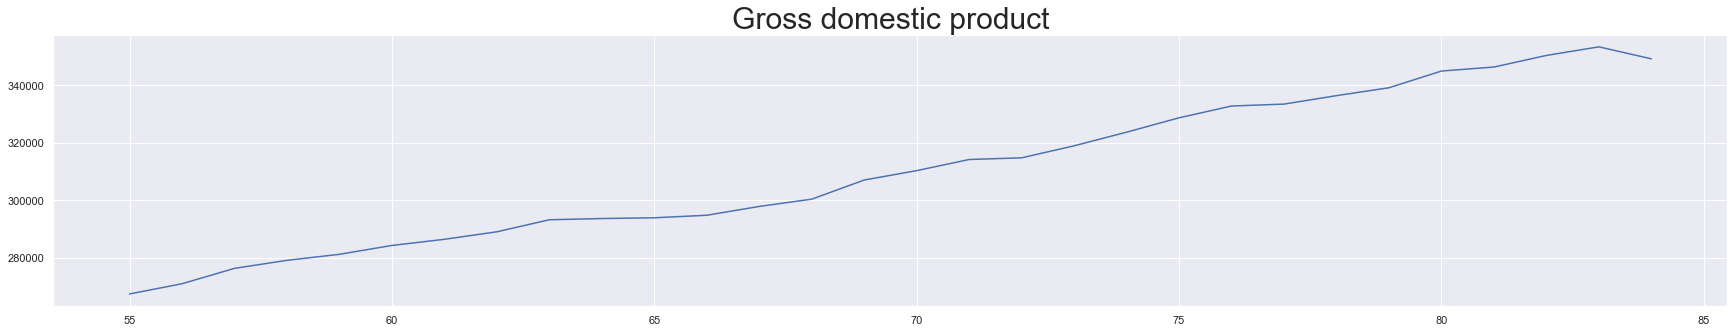

In [101]:
df['GDP'].plot()
plt.title('Gross domestic product',fontdict={'fontsize':30});

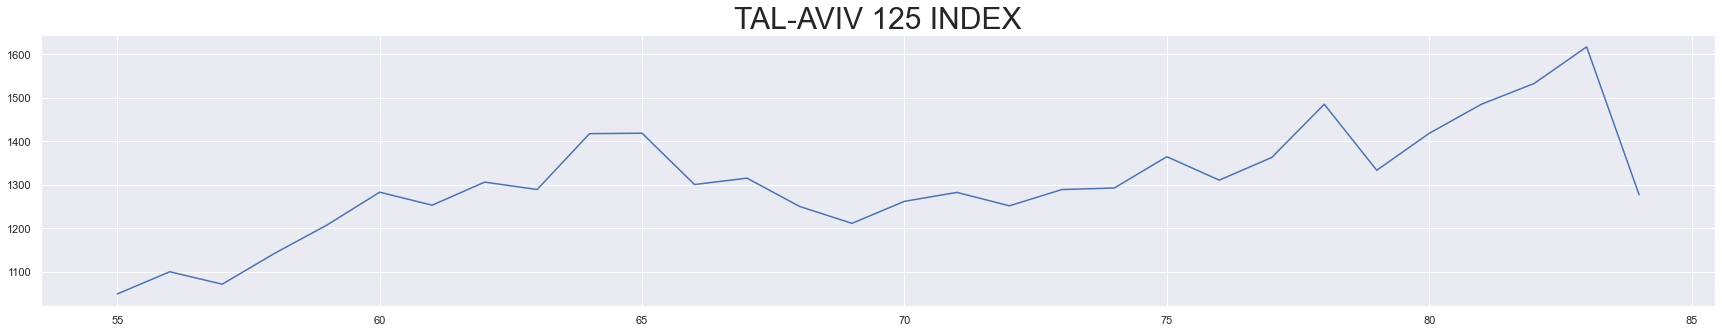

In [102]:
df['TA-125-CLOSE'].plot()
plt.title('TAL-AVIV 125 INDEX',fontdict={'fontsize':30});

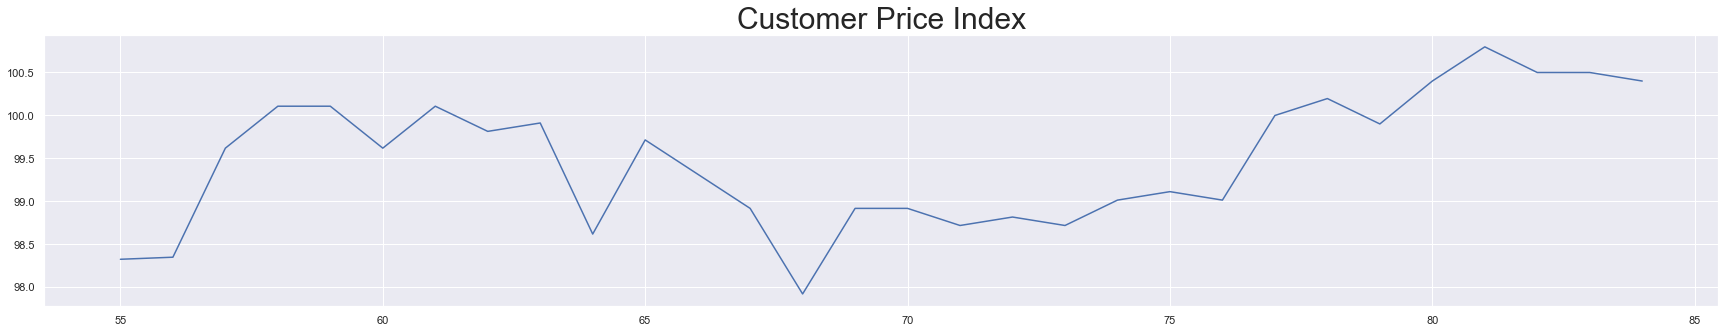

In [103]:
df['CP-I'].plot()
plt.title('Customer Price Index',fontdict={'fontsize':30});

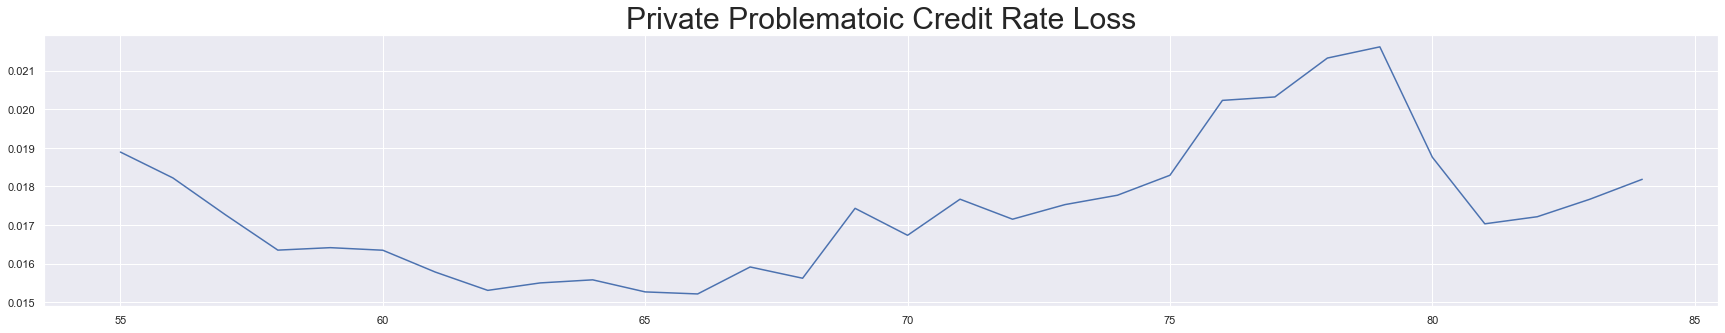

In [104]:
df['PRIVATE-P-C-R'].plot()
plt.title('Private Problematoic Credit Rate Loss',fontdict={'fontsize':30});

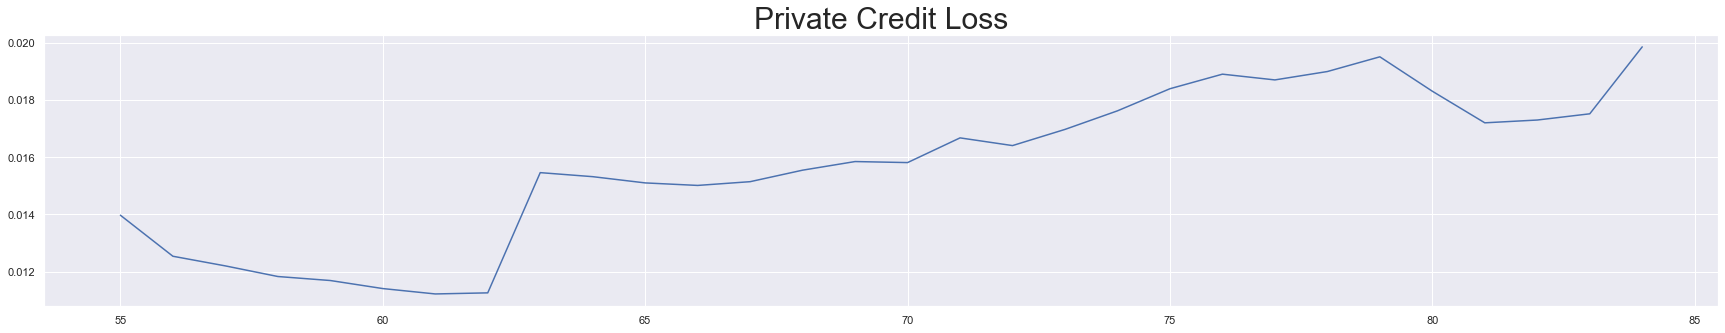

In [105]:
PROVISION_P.plot()
plt.title('Private Credit Loss',fontdict={'fontsize':30});

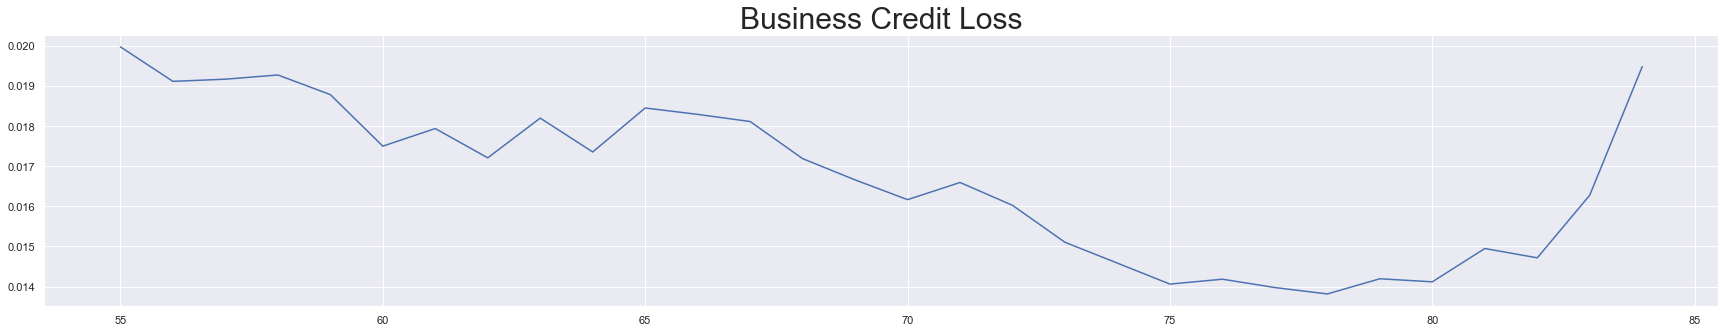

In [106]:
PROVISION_B.plot()
plt.title('Business Credit Loss',fontdict={'fontsize':30});

### RECAP and Insights

It can be seen that "Problem Credit" is more like to the provisions of the bank market
than to the provisions of the credit card market.

The data is from 2012, at this time there was a new regulation on problem credit

# The Model
### Correlation & selection
After try using different methods ,I used in Backward Elimination method and lowest correlation. 

My significance level to stay in the Model is SL=0.05

The process is:
1. Fit the model
2. Remove the var whit highest P_value and go to 1
3. Remove var whit lowest correlation to y (provision)
4. keep the R-squared > 0.6

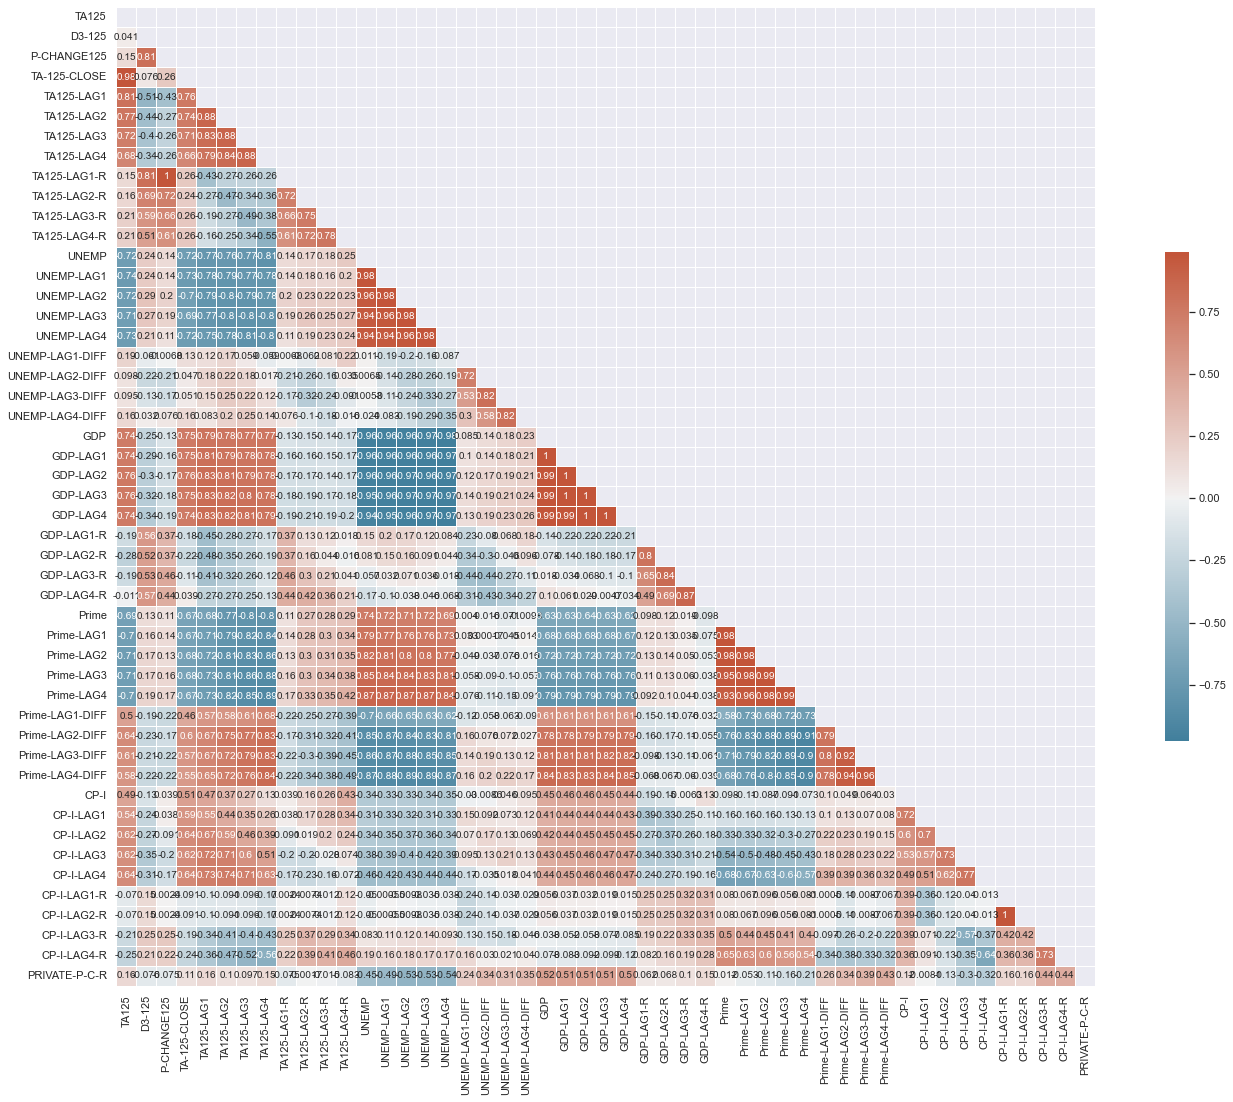

In [107]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Preprocess
### split the data

In [108]:
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PRIVATE-P-C-R
55,31/12/2012,12-Dec,1073.471818,0.0,-0.005234,1049.06,1054.58,969.86,1032.48,978.49,...,98.319679,98.784767,97.668555,97.110449,96.738379,-0.004708,-0.004708,0.012452,0.016346,0.018890
56,31/03/2013,Mar-13,1101.886111,0.0,0.048596,1100.04,1049.06,1054.58,969.86,1032.48,...,98.343868,98.319679,98.784767,97.668555,97.110449,0.000246,0.000246,0.006914,0.012701,0.018221
57,30/06/2013,Jun-13,1094.010952,-1.0,-0.025990,1071.45,1100.04,1049.06,1054.58,969.86,...,99.615978,98.343868,98.319679,98.784767,97.668555,0.012935,0.012935,0.008414,0.019939,0.017268
58,30/09/2013,Sep-13,1108.793750,0.0,0.066321,1142.51,1071.45,1100.04,1049.06,1054.58,...,100.105251,99.615978,98.343868,98.319679,98.784767,0.004912,0.004912,0.018161,0.013367,0.016352
59,31/12/2013,Dec-13,1207.807826,0.0,0.057050,1207.69,1142.51,1071.45,1100.04,1049.06,...,100.105251,100.105251,99.615978,98.343868,98.319679,0.000000,0.000000,0.017910,0.018161,0.016416
60,31/03/2014,Mar-14,1273.445238,0.0,0.062218,1282.83,1207.69,1142.51,1071.45,1100.04,...,99.615978,100.105251,100.105251,99.615978,98.343868,-0.004888,-0.004888,0.000000,0.012935,0.016349
61,30/06/2014,Jun-14,1260.286000,-1.0,-0.023292,1252.95,1282.83,1207.69,1142.51,1071.45,...,100.105251,99.615978,100.105251,100.105251,99.615978,0.004912,0.004912,0.000000,0.004912,0.015784
62,30/09/2014,Sep-14,1291.975000,0.0,0.042332,1305.99,1252.95,1282.83,1207.69,1142.51,...,99.811687,100.105251,99.615978,100.105251,100.105251,-0.002933,-0.002933,-0.002933,-0.002933,0.015310
63,31/12/2014,Dec-14,1304.893478,0.0,-0.013063,1288.93,1305.99,1252.95,1282.83,1207.69,...,99.909541,99.811687,100.105251,99.615978,100.105251,0.000980,0.000980,0.002947,-0.001955,0.015503
64,31/03/2015,Mar-15,1386.289048,0.0,0.099579,1417.28,1288.93,1305.99,1252.95,1282.83,...,98.613945,99.909541,99.811687,100.105251,99.615978,-0.012968,-0.012968,-0.014897,-0.010059,0.015583


In [109]:
df.iloc[:,-1:]

,PRIVATE-P-C-R
55,0.018890
56,0.018221
57,0.017268
58,0.016352
59,0.016416
60,0.016349
61,0.015784
62,0.015310
63,0.015503
64,0.015583


In [110]:
x = df.iloc[:,2 :-1]
y_provision = df.iloc[:,-1:]

In [111]:
x_columns = x.columns
x_columns

Index(['TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE', 'TA125-LAG1',
       'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R'],
      dtype='object')

In [112]:
x_columns = ['TA125', 'D3-125', 'TA-125-CLOSE',
             'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG1-R',
             'TA125-LAG2-R', 'UNEMP', 'UNEMP-LAG1',
             'UNEMP-LAG2', 'UNEMP-LAG1-DIFF',
             'UNEMP-LAG2-DIFF', 'GDP', 'GDP-LAG1',
             'GDP-LAG2', 'GDP-LAG1-R', 'GDP-LAG2-R',
              'Prime', 'Prime-LAG1', 'Prime-LAG2',
              'Prime-LAG1-DIFF', 'Prime-LAG2-DIFF',
              'CP-I', 'CP-I-LAG1', 'CP-I-LAG2',
              'CP-I-LAG1-R', 'CP-I-LAG2-R']

x_columns = ['TA125', 'D2-125', 'D3-125', 'D4-124', 'P-CHANGE125', 'TA-125-CLOSE',
             'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG1-R', 'TA125-LAG2-R', 'UNEMP',
             'UNEMP-LAG1', 'UNEMP-LAG2', 'UNEMP-LAG1-R', 'UNEMP-LAG2-R', 'GDP',
             'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG1-R', 'GDP-LAG2-R', 'CP-I', 'CP-I-LAG1',
             'CP-I-LAG2', 'CP-I-LAG1-R', 'CP-I-LAG2-R', 'Dummy-t', 'Dummy-p']

#### We have only 30  observation, so this impassible to input more than 29 features into the regression

In [113]:
df[x_columns]

,TA125,D3-125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG1-R,TA125-LAG2-R,UNEMP,UNEMP-LAG1,UNEMP-LAG2,...,Prime,Prime-LAG1,Prime-LAG2,Prime-LAG1-DIFF,Prime-LAG2-DIFF,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG1-R,CP-I-LAG2-R
55,1073.471818,0.0,1049.06,1054.58,969.86,-0.005234,0.081661,0.068734,0.067007,0.068781,...,0.03460,0.03750,0.03975,-0.00290,-0.00515,98.319679,98.784767,97.668555,-0.004708,-0.004708
56,1101.886111,0.0,1100.04,1049.06,1054.58,0.048596,0.043107,0.067734,0.068734,0.067007,...,0.03250,0.03460,0.03750,-0.00210,-0.00500,98.343868,98.319679,98.784767,0.000246,0.000246
57,1094.010952,-1.0,1071.45,1100.04,1049.06,-0.025990,0.021343,0.065491,0.067734,0.068734,...,0.02750,0.03250,0.03460,-0.00500,-0.00710,99.615978,98.343868,98.319679,0.012935,0.012935
58,1108.793750,0.0,1142.51,1071.45,1100.04,0.066321,0.038608,0.059098,0.065491,0.067734,...,0.02717,0.02750,0.03250,-0.00033,-0.00533,100.105251,99.615978,98.343868,0.004912,0.004912
59,1207.807826,0.0,1207.69,1142.51,1071.45,0.057050,0.127155,0.057491,0.059098,0.065491,...,0.02500,0.02717,0.02750,-0.00217,-0.00250,100.105251,100.105251,99.615978,0.000000,0.000000
60,1273.445238,0.0,1282.83,1207.69,1142.51,0.062218,0.122817,0.058012,0.057491,0.059098,...,0.02250,0.02500,0.02717,-0.00250,-0.00467,99.615978,100.105251,100.105251,-0.004888,-0.004888
61,1260.286000,-1.0,1252.95,1282.83,1207.69,-0.023292,0.037477,0.059544,0.058012,0.057491,...,0.02250,0.02250,0.02500,0.00000,-0.00250,100.105251,99.615978,100.105251,0.004912,0.004912
62,1291.975000,0.0,1305.99,1252.95,1282.83,0.042332,0.018054,0.060678,0.059544,0.058012,...,0.01750,0.02250,0.02250,-0.00500,-0.00500,99.811687,100.105251,99.615978,-0.002933,-0.002933
63,1304.893478,0.0,1288.93,1305.99,1252.95,-0.013063,0.028716,0.056887,0.060678,0.059544,...,0.01750,0.01750,0.02250,0.00000,-0.00500,99.909541,99.811687,100.105251,0.000980,0.000980
64,1386.289048,0.0,1417.28,1288.93,1305.99,0.099579,0.085215,0.054640,0.056887,0.060678,...,0.01600,0.01750,0.01750,-0.00150,-0.00150,98.613945,99.909541,99.811687,-0.012968,-0.012968


# Build the model
create function to fit

In [114]:
def set_lr():
    """
    this function run the regression
    :return: the result of the regressor and print list of p_value order by high
    """
    x = df[x_columns]
    x = sm.add_constant(x)
    result = sm.OLS(y_provision,x).fit()
    print(result.summary())
    
    d = {}
    for i in x.columns.tolist():
        d[f'{i}'] = result.pvalues[i]
    
    df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(['p-Value'],ascending=[False]).reset_index(drop=True)
    print(df_pvalue)
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     6.431
Date:                Mon, 09 Jan 2023   Prob (F-statistic):            0.00859
Time:                        15:53:04   Log-Likelihood:                 194.26
No. Observations:                  30   AIC:                            -342.5
Df Residuals:                       7   BIC:                            -310.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0269      0.050     

### Remove columns with p_value > 0.05

In [115]:
x_columns.remove('TA125-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     7.696
Date:                Mon, 09 Jan 2023   Prob (F-statistic):            0.00292
Time:                        15:53:04   Log-Likelihood:                 194.26
No. Observations:                  30   AIC:                            -344.5
Df Residuals:                       8   BIC:                            -313.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0283      0.040     

In [116]:
x_columns.remove('GDP-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     9.032
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           0.000943
Time:                        15:53:04   Log-Likelihood:                 194.16
No. Observations:                  30   AIC:                            -346.3
Df Residuals:                       9   BIC:                            -316.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0270      0.038     

In [117]:
x_columns.remove('Prime')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     9.032
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           0.000943
Time:                        15:53:04   Log-Likelihood:                 194.16
No. Observations:                  30   AIC:                            -346.3
Df Residuals:                       9   BIC:                            -316.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0270      0.038     

In [118]:
x_columns.remove('TA125-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     10.44
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           0.000290
Time:                        15:53:04   Log-Likelihood:                 194.00
No. Observations:                  30   AIC:                            -348.0
Df Residuals:                      10   BIC:                            -320.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0236      0.034     

In [119]:
x_columns.remove('CP-I-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           8.88e-05
Time:                        15:53:04   Log-Likelihood:                 193.68
No. Observations:                  30   AIC:                            -349.4
Df Residuals:                      11   BIC:                            -322.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0288      0.031     

In [120]:
x_columns.remove('UNEMP')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           8.88e-05
Time:                        15:53:04   Log-Likelihood:                 193.68
No. Observations:                  30   AIC:                            -349.4
Df Residuals:                      11   BIC:                            -322.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0288      0.031     

In [121]:
x_columns.remove('Prime-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           8.88e-05
Time:                        15:53:04   Log-Likelihood:                 193.68
No. Observations:                  30   AIC:                            -349.4
Df Residuals:                      11   BIC:                            -322.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0288      0.031     

In [122]:
x_columns.remove('Prime-LAG2-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           3.97e-05
Time:                        15:53:04   Log-Likelihood:                 192.23
No. Observations:                  30   AIC:                            -348.5
Df Residuals:                      12   BIC:                            -323.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0195      0.030     

In [123]:
x_columns.remove('Prime-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     13.28
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.51e-05
Time:                        15:53:04   Log-Likelihood:                 191.24
No. Observations:                  30   AIC:                            -348.5
Df Residuals:                      13   BIC:                            -324.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0291      0.028     

In [124]:
x_columns.remove('UNEMP-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     13.28
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.51e-05
Time:                        15:53:04   Log-Likelihood:                 191.24
No. Observations:                  30   AIC:                            -348.5
Df Residuals:                      13   BIC:                            -324.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0291      0.028     

In [125]:
x_columns.remove('GDP-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     11.79
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.82e-05
Time:                        15:53:05   Log-Likelihood:                 187.63
No. Observations:                  30   AIC:                            -343.3
Df Residuals:                      14   BIC:                            -320.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0172      0.030     

In [126]:
x_columns.remove('UNEMP-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     11.85
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.13e-05
Time:                        15:53:05   Log-Likelihood:                 185.79
No. Observations:                  30   AIC:                            -341.6
Df Residuals:                      15   BIC:                            -320.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0108      0.030     

In [127]:
x_columns.remove('Prime-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     12.47
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.34e-06
Time:                        15:53:05   Log-Likelihood:                 184.59
No. Observations:                  30   AIC:                            -341.2
Df Residuals:                      16   BIC:                            -321.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0029      0.028     

In [128]:
x_columns.remove('GDP-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     11.97
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.02e-06
Time:                        15:53:05   Log-Likelihood:                 182.13
No. Observations:                  30   AIC:                            -338.3
Df Residuals:                      17   BIC:                            -320.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0050      0.029     

In [129]:
x_columns.remove('GDP-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        15:53:05   Log-Likelihood:                 180.89
No. Observations:                  30   AIC:                            -337.8
Df Residuals:                      18   BIC:                            -321.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.029     

In [130]:
x_columns.remove('CP-I-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     12.60
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        15:53:05   Log-Likelihood:                 180.89
No. Observations:                  30   AIC:                            -337.8
Df Residuals:                      18   BIC:                            -321.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.029     

In [131]:
x_columns.remove('CP-I-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     12.91
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.75e-06
Time:                        15:53:05   Log-Likelihood:                 179.25
No. Observations:                  30   AIC:                            -336.5
Df Residuals:                      19   BIC:                            -321.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0117      0.029     

In [132]:
x_columns.remove('CP-I-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     15.06
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           4.39e-07
Time:                        15:53:05   Log-Likelihood:                 179.21
No. Observations:                  30   AIC:                            -338.4
Df Residuals:                      20   BIC:                            -324.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0158      0.022     

In [133]:
x_columns.remove('CP-I')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     17.60
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.08e-07
Time:                        15:53:05   Log-Likelihood:                 179.07
No. Observations:                  30   AIC:                            -340.1
Df Residuals:                      21   BIC:                            -327.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0066      0.002     

In [134]:
x_columns.remove('UNEMP-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     18.08
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           9.07e-08
Time:                        15:53:05   Log-Likelihood:                 177.09
No. Observations:                  30   AIC:                            -338.2
Df Residuals:                      22   BIC:                            -327.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0068      0.002     

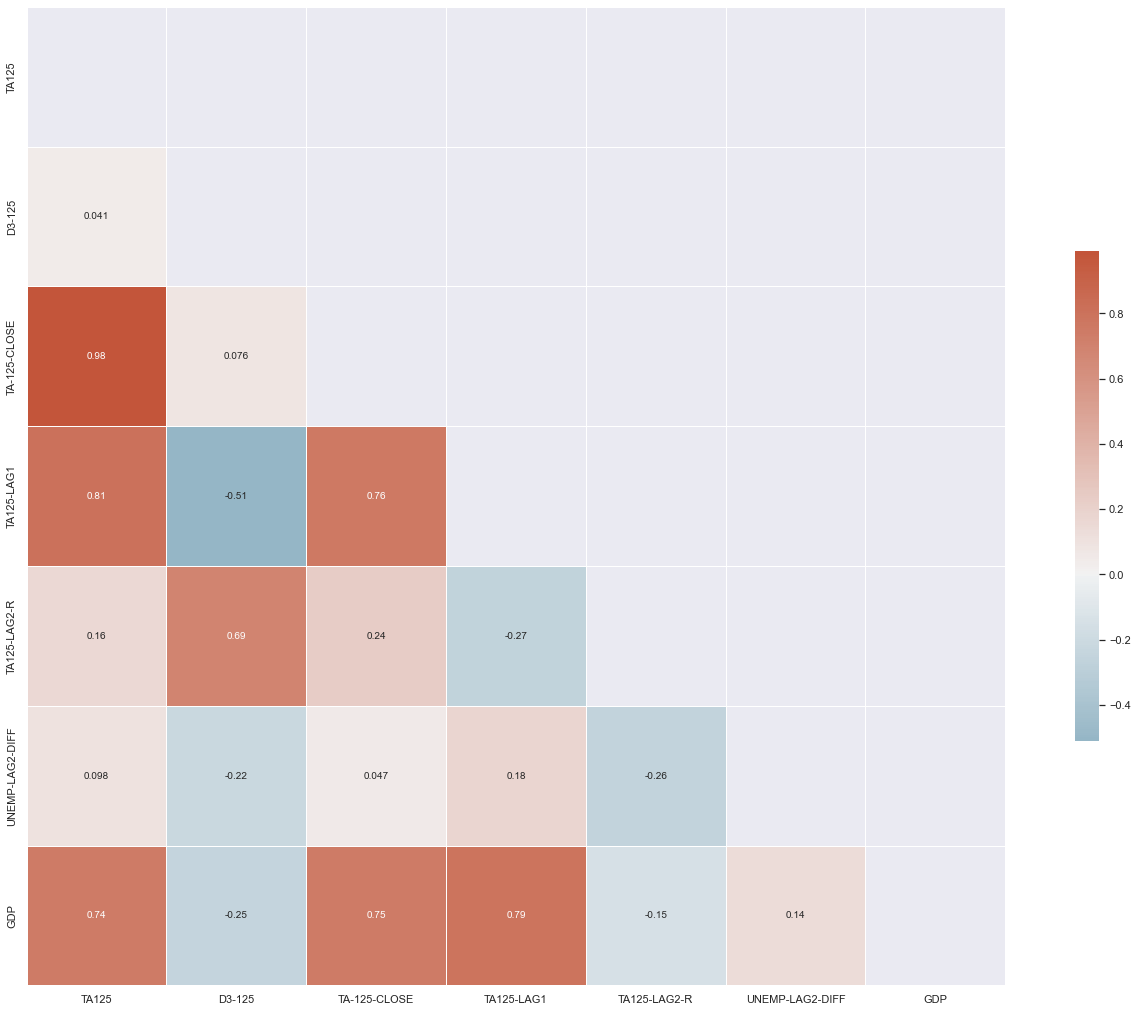

In [135]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

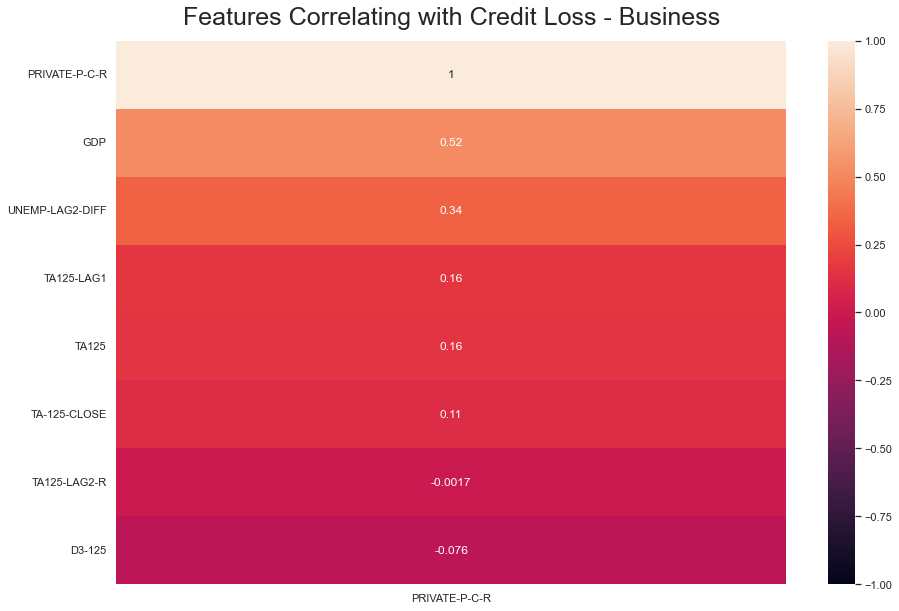

In [136]:
sns.set(rc={'figure.figsize': (15, 10)})
heatmap = sns.heatmap(z.corr()[['PRIVATE-P-C-R']].sort_values(by='PRIVATE-P-C-R', ascending=False), vmin=-1, vmax=1,
                      annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize': 25}, pad=16)
plt.yticks(rotation=0)
plt.show()

In [137]:
x_columns.remove('GDP')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.7766
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.596
Time:                        15:53:06   Log-Likelihood:                 151.21
No. Observations:                  30   AIC:                            -288.4
Df Residuals:                      23   BIC:                            -278.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0158      0.004     

In [138]:
x_columns.remove('TA125-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9629
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.460
Time:                        15:53:06   Log-Likelihood:                 151.19
No. Observations:                  30   AIC:                            -290.4
Df Residuals:                      24   BIC:                            -282.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0157      0.004     

In [139]:
x_columns.remove('D3-125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.171
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.348
Time:                        15:53:06   Log-Likelihood:                 151.02
No. Observations:                  30   AIC:                            -292.0
Df Residuals:                      25   BIC:                            -285.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0157      0.003     

In [140]:
x_columns.remove('TA125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.263
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.308
Time:                        15:53:06   Log-Likelihood:                 150.48
No. Observations:                  30   AIC:                            -293.0
Df Residuals:                      26   BIC:                            -287.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0164      0.003     

In [141]:
x_columns.remove('TA-125-CLOSE')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.867
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.174
Time:                        15:53:06   Log-Likelihood:                 150.39
No. Observations:                  30   AIC:                            -294.8
Df Residuals:                      27   BIC:                            -290.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0178      0.000     

In [142]:
x_columns.append('Prime-LAG4-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3.705
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0242
Time:                        15:53:06   Log-Likelihood:                 153.78
No. Observations:                  30   AIC:                            -299.6
Df Residuals:                      26   BIC:                            -294.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0182      0.000     

In [143]:
x_columns.append('GDP-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.488
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0214
Time:                        15:53:06   Log-Likelihood:                 155.09
No. Observations:                  30   AIC:                            -300.2
Df Residuals:                      25   BIC:                            -293.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0167      0.001     

In [144]:
x_columns.remove('TA125-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     4.624
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0101
Time:                        15:53:06   Log-Likelihood:                 154.86
No. Observations:                  30   AIC:                            -301.7
Df Residuals:                      26   BIC:                            -296.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0165      0.001     

In [145]:
x_columns.append('CP-I-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     9.995
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.67e-05
Time:                        15:53:06   Log-Likelihood:                 162.77
No. Observations:                  30   AIC:                            -315.5
Df Residuals:                      25   BIC:                            -308.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0173      0.001     

In [146]:
x_columns.remove('GDP-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.34
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.83e-05
Time:                        15:53:06   Log-Likelihood:                 162.42
No. Observations:                  30   AIC:                            -316.8
Df Residuals:                      26   BIC:                            -311.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179      0.000     

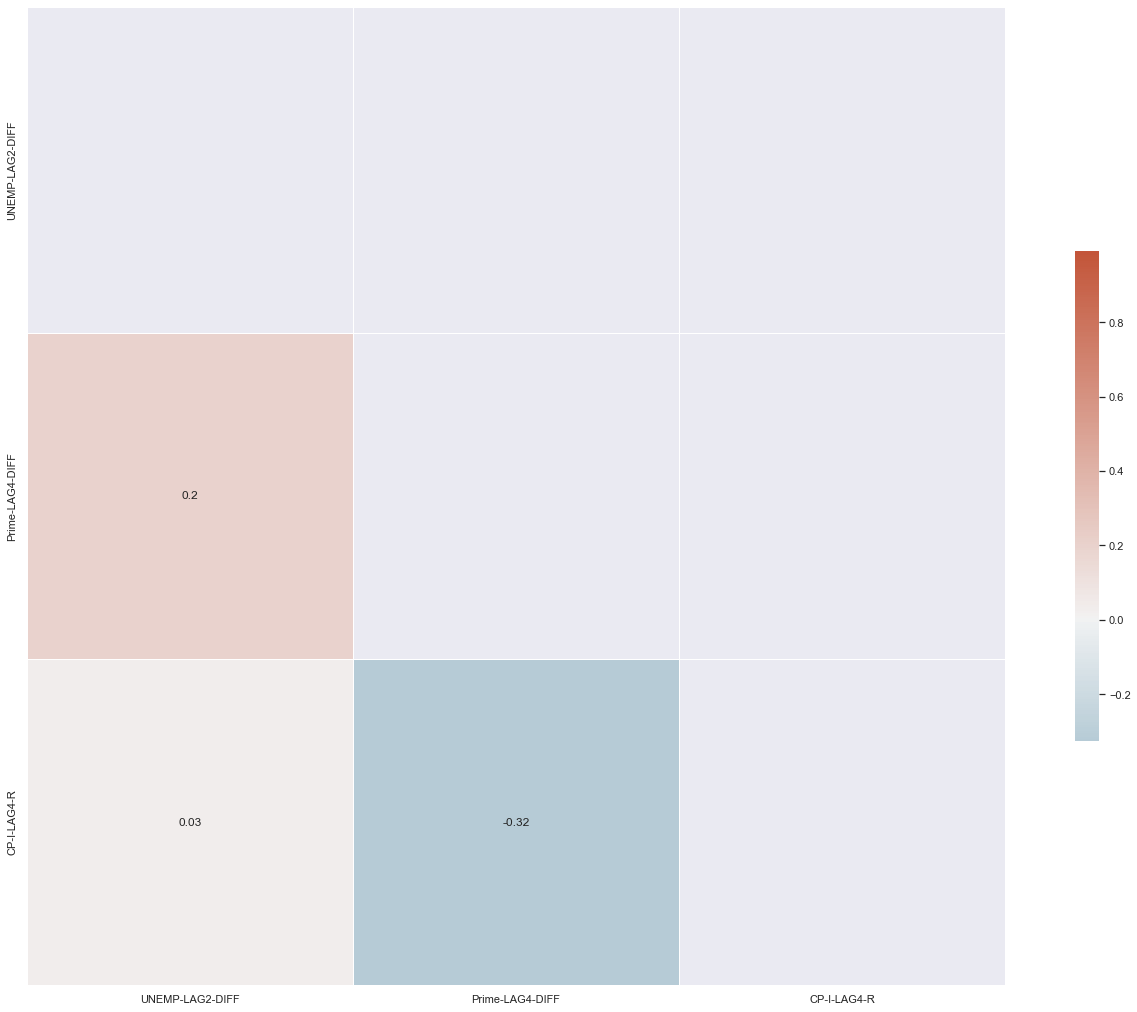

In [147]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [148]:
x = df[x_columns]
x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.34
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.83e-05
Time:                        15:53:06   Log-Likelihood:                 162.42
No. Observations:                  30   AIC:                            -316.8
Df Residuals:                      26   BIC:                            -311.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179      0.000     

In [149]:
predict = pd.DataFrame()
predict["Real"] = df["PRIVATE-P-C-R"].astype(float)
predict["predict"] = result.predict(x)
predict["Absolut_Error"] = abs(predict["predict"] - predict["Real"])
predict["Square_Error"] = (predict["predict"] - predict["Real"]) ** 2


In [150]:
print(predict["Absolut_Error"].mean())


0.0008453711345989378


In [151]:
print(predict["Square_Error"].mean())

1.161342757671987e-06


In [152]:
# Try without const

In [153]:
x = df[x_columns]
#x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          PRIVATE-P-C-R   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.399
Method:                 Least Squares   F-statistic:                              7.649
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    0.000742
Time:                        15:53:06   Log-Likelihood:                          88.016
No. Observations:                  30   AIC:                                     -170.0
Df Residuals:                      27   BIC:                                     -165.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [247]:
df = pd.read_csv('C:\project\max\Database/unemp_25_64_macro_model_database_private_sector_provision_all_feature.csv')
df = df[55:85]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,TA125-LAG1-R,TA125-LAG2-R,TA125-LAG3-R,TA125-LAG4-R,UNEMP,UNEMP-LAG1,UNEMP-LAG2,UNEMP-LAG3,UNEMP-LAG4,UNEMP-LAG1-DIFF,UNEMP-LAG2-DIFF,UNEMP-LAG3-DIFF,UNEMP-LAG4-DIFF,GDP,GDP-LAG1,GDP-LAG2,GDP-LAG3,GDP-LAG4,GDP-LAG1-R,GDP-LAG2-R,GDP-LAG3-R,GDP-LAG4-R,Prime,Prime-LAG1,Prime-LAG2,Prime-LAG3,Prime-LAG4,Prime-LAG1-DIFF,Prime-LAG2-DIFF,Prime-LAG3-DIFF,Prime-LAG4-DIFF,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,Dummy-t,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C,25_64_unemp,25_64_unemp_LAG1,25_64_unemp_LAG2,25_64_unemp_LAG2_DIFF
55,31/12/2012,12-Dec,1073.471818,0.0,-0.005234,1049.06,1054.58,969.86,1032.48,978.49,-0.005234,0.081661,0.016058,0.072121,0.068734,0.067007,0.068781,0.071196,0.068417,0.001727,-0.000047,-0.002462,0.000317,267393.687,266001.373,263517.895,263653.580,262695.013,0.005234,0.014708,0.014186,0.017886,3.460,3.750,3.975,4.000,4.250,-0.290,-0.515,-0.52,-0.790,98.319679,98.784767,97.668555,97.110449,96.738379,-0.004708,-0.004708,0.012452,0.016346,0.0,0.019968,0.013967,0.018890,NaN,0.058341,0.058217,0.059941,-0.001600
56,31/03/2013,Mar-13,1101.886111,0.0,0.048596,1100.04,1049.06,1054.58,969.86,1032.48,0.048596,0.043107,0.134226,0.065435,0.067734,0.068734,0.067007,0.068781,0.071196,-0.001000,0.000727,-0.001047,-0.003462,270939.424,267393.687,266001.373,263517.895,263653.580,0.013260,0.018564,0.028163,0.027634,3.250,3.460,3.750,3.975,4.000,-0.210,-0.500,-0.50,-0.750,98.343868,98.319679,98.784767,97.668555,97.110449,0.000246,0.000246,0.006914,0.012701,0.0,0.019109,0.012534,0.018221,-0.036835,0.057077,0.058341,0.058217,-0.001141
57,30/06/2013,Jun-13,1094.010952,-1.0,-0.025990,1071.45,1100.04,1049.06,1054.58,969.86,-0.025990,0.021343,0.015997,0.104747,0.065491,0.067734,0.068734,0.067007,0.068781,-0.002243,-0.003243,-0.001516,-0.003290,276291.035,270939.424,267393.687,266001.373,263517.895,0.019752,0.033274,0.038683,0.048472,2.750,3.250,3.460,3.750,3.975,-0.500,-0.710,-0.71,-1.225,99.615978,98.343868,98.319679,98.784767,97.668555,0.012935,0.012935,0.008414,0.019939,0.0,0.019163,0.012197,0.017268,-0.052624,0.056481,0.057077,0.058341,-0.001861
58,30/09/2013,Sep-13,1108.793750,0.0,0.066321,1142.51,1071.45,1100.04,1049.06,1054.58,0.066321,0.038608,0.089080,0.083379,0.059098,0.065491,0.067734,0.068734,0.067007,-0.006393,-0.008636,-0.009636,-0.007909,279082.780,276291.035,270939.424,267393.687,266001.373,0.010104,0.030056,0.043715,0.049178,2.717,2.750,3.250,3.460,3.750,-0.033,-0.533,-0.53,-1.033,100.105251,99.615978,98.343868,98.319679,98.784767,0.004912,0.004912,0.018161,0.013367,0.0,0.019268,0.011826,0.016352,-0.053393,0.052526,0.056481,0.057077,-0.004551
59,31/12/2013,Dec-13,1207.807826,0.0,0.057050,1207.69,1142.51,1071.45,1100.04,1049.06,0.057050,0.127155,0.097860,0.151212,0.057491,0.059098,0.065491,0.067734,0.068734,-0.001607,-0.008000,-0.010243,-0.011243,281178.396,279082.780,276291.035,270939.424,267393.687,0.007509,0.017689,0.037791,0.051552,2.500,2.717,2.750,3.250,3.460,-0.217,-0.250,-0.25,-0.960,100.105251,100.105251,99.615978,98.343868,98.319679,0.000000,0.000000,0.017910,0.018161,0.0,0.018779,0.011686,0.016416,0.003764,0.050801,0.052526,0.056481,-0.005679
60,31/03/2014,Mar-14,1273.445238,0.0,0.062218,1282.83,1207.69,1142.51,1071.45,1100.04,0.062218,0.122817,0.197284,0.166167,0.058012,0.057491,0.059098,0.065491,0.067734,0.000521,-0.001086,-0.007479,-0.009722,284263.195,281178.396,279082.780,276291.035,270939.424,0.010971,0.018562,0.028854,0.049176,2.250,2.500,2.717,2.750,3.250,-0.250,-0.467,-0.47,-1.000,99.615978,100.105251,100.105251,99.615978,98.343868,-0.004888,-0.004888,0.000000,0.012935,0.0,0.017496,0.011405,0.016349,-0.004340,0.050743,0.050801,0.052526,-0.001783
61,30/06/2014,Jun-14,1260.286000,-1.0,-0.023292,1252.95,1282.83,1207.69,1142.51,1071.45,-0.023292,0.037477,0.096664,0.169397,0.059544,0.058012,0.057491,0.059098,0.065491,0.001532,0.002053,0.000446,-0.005947,286

In [255]:
x_columns = ['25_64_unemp_LAG2_DIFF', 'CP-I-LAG4-R', 'Prime-LAG4-DIFF']

In [256]:
y_provision = df[["PRIVATE-P-C-R"]]
y_provision

,PRIVATE-P-C-R
55,0.018890
56,0.018221
57,0.017268
58,0.016352
59,0.016416
60,0.016349
61,0.015784
62,0.015310
63,0.015503
64,0.015583


0.006605421666666668

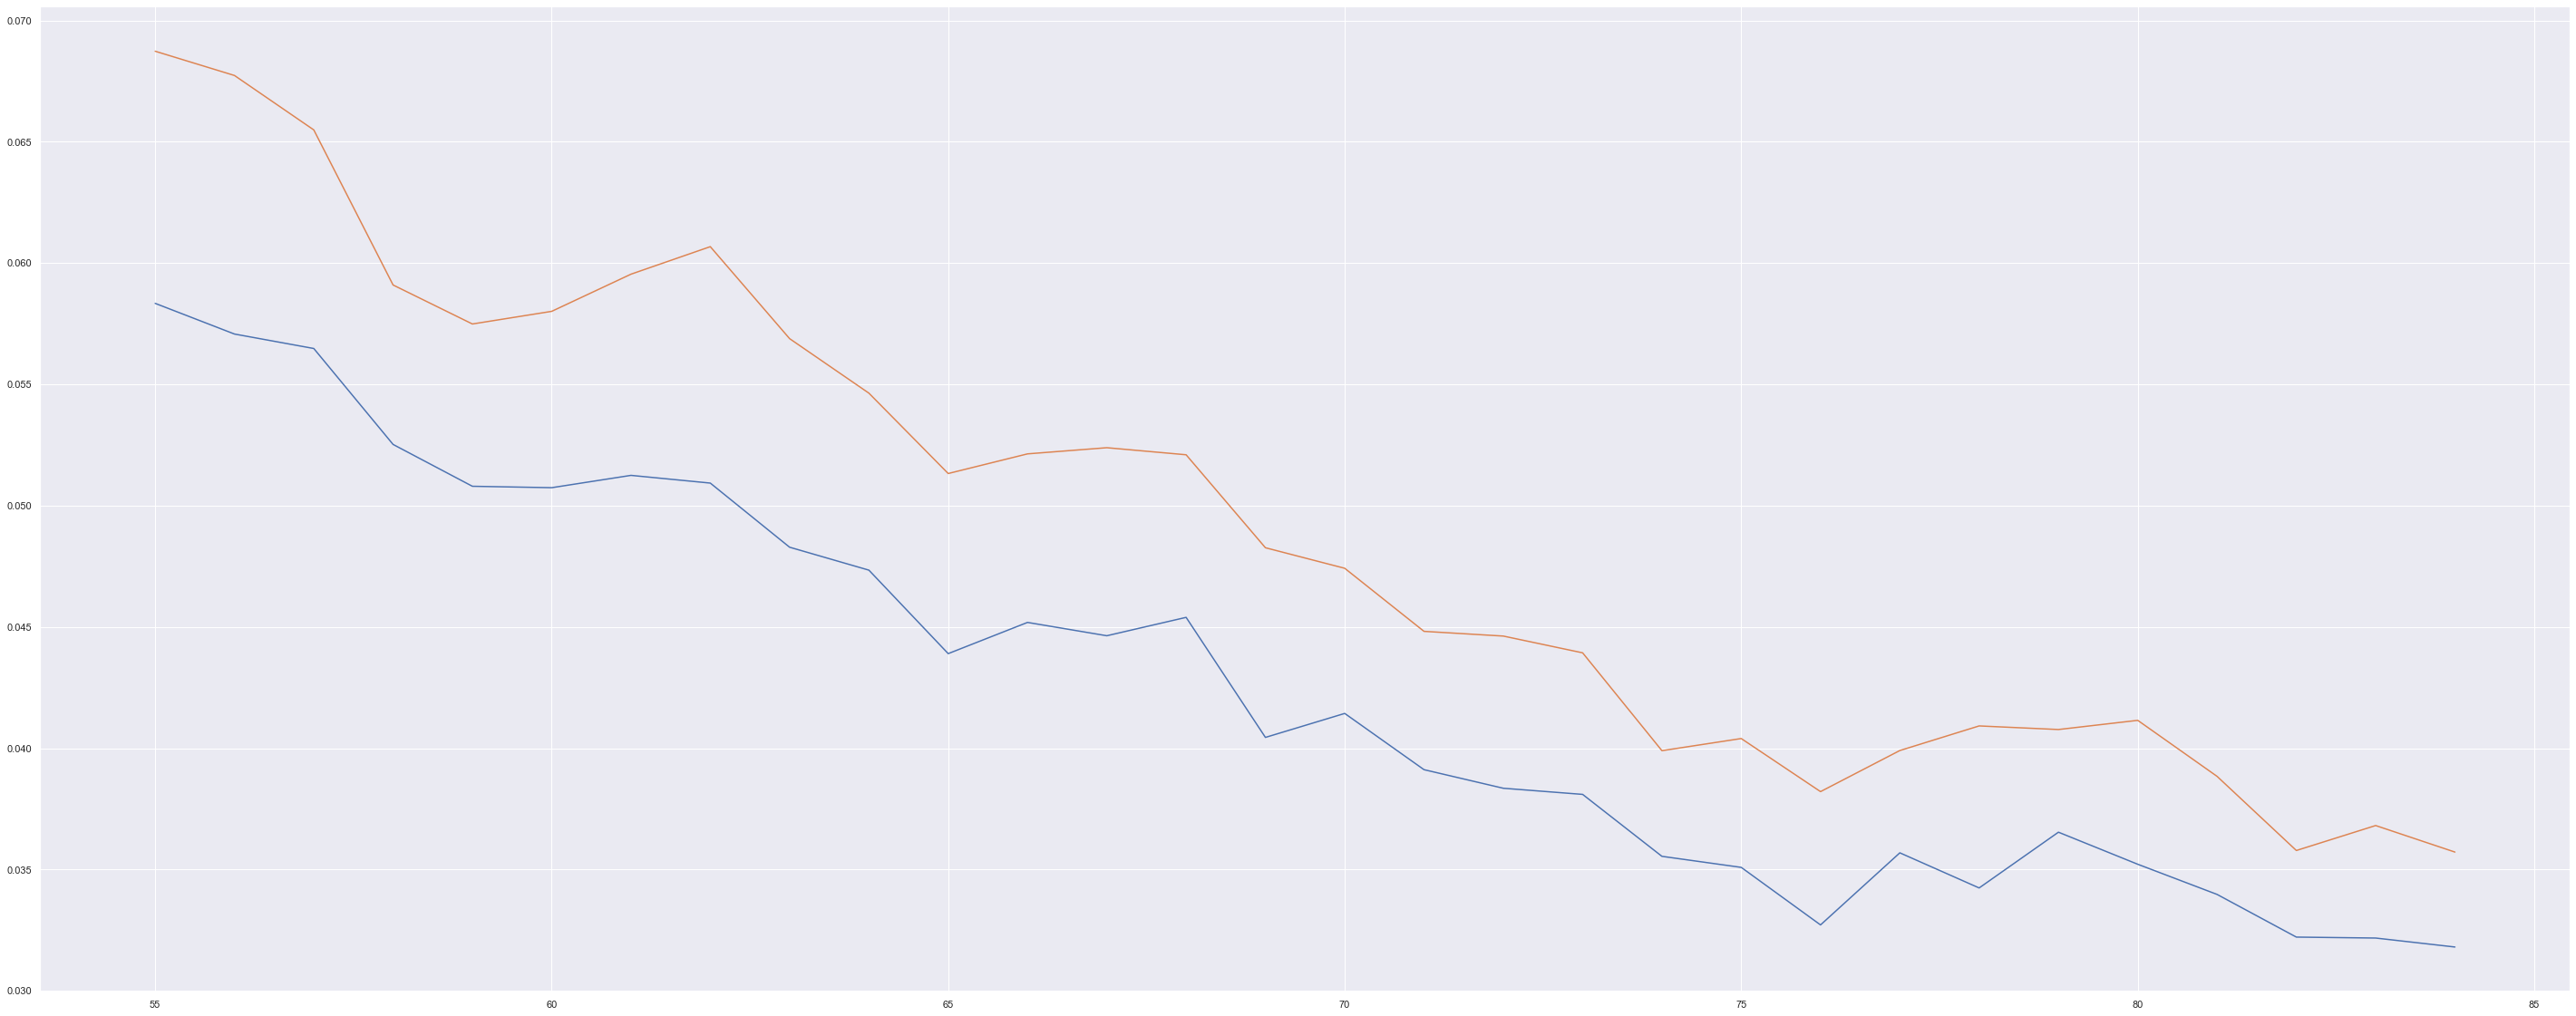

In [266]:
df["25_64_unemp"].plot()
df["UNEMP"].plot()

df["diff"] = df["UNEMP"]-df["25_64_unemp"]
df["diff"].mean()

In [257]:
x = df[x_columns]
x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     13.17
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.01e-05
Time:                        09:04:10   Log-Likelihood:                 162.31
No. Observations:                  30   AIC:                            -316.6
Df Residuals:                      26   BIC:                            -311.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [154]:
x = df[x_columns]
x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     13.34
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.83e-05
Time:                        15:53:06   Log-Likelihood:                 162.42
No. Observations:                  30   AIC:                            -316.8
Df Residuals:                      26   BIC:                            -311.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179      0.000     

In [ ]:
aaaaa

# The model by Lior
Using stepwise method


In [155]:
x_columns = ['TA125-LAG4', 'UNEMP-LAG2','UNEMP-LAG3', 'UNEMP-LAG4', 'Prime-LAG2-DIFF','CP-I-LAG4-R']

In [156]:
set_lr()

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     6.193
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           0.000560
Time:                        15:53:07   Log-Likelihood:                 162.87
No. Observations:                  30   AIC:                            -311.7
Df Residuals:                      23   BIC:                            -301.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0308      0.007     

In [157]:
x = df[x_columns]
#x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          PRIVATE-P-C-R   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              618.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    4.49e-25
Time:                        15:53:07   Log-Likelihood:                          154.49
No. Observations:                  30   AIC:                                     -297.0
Df Residuals:                      24   BIC:                                     -288.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

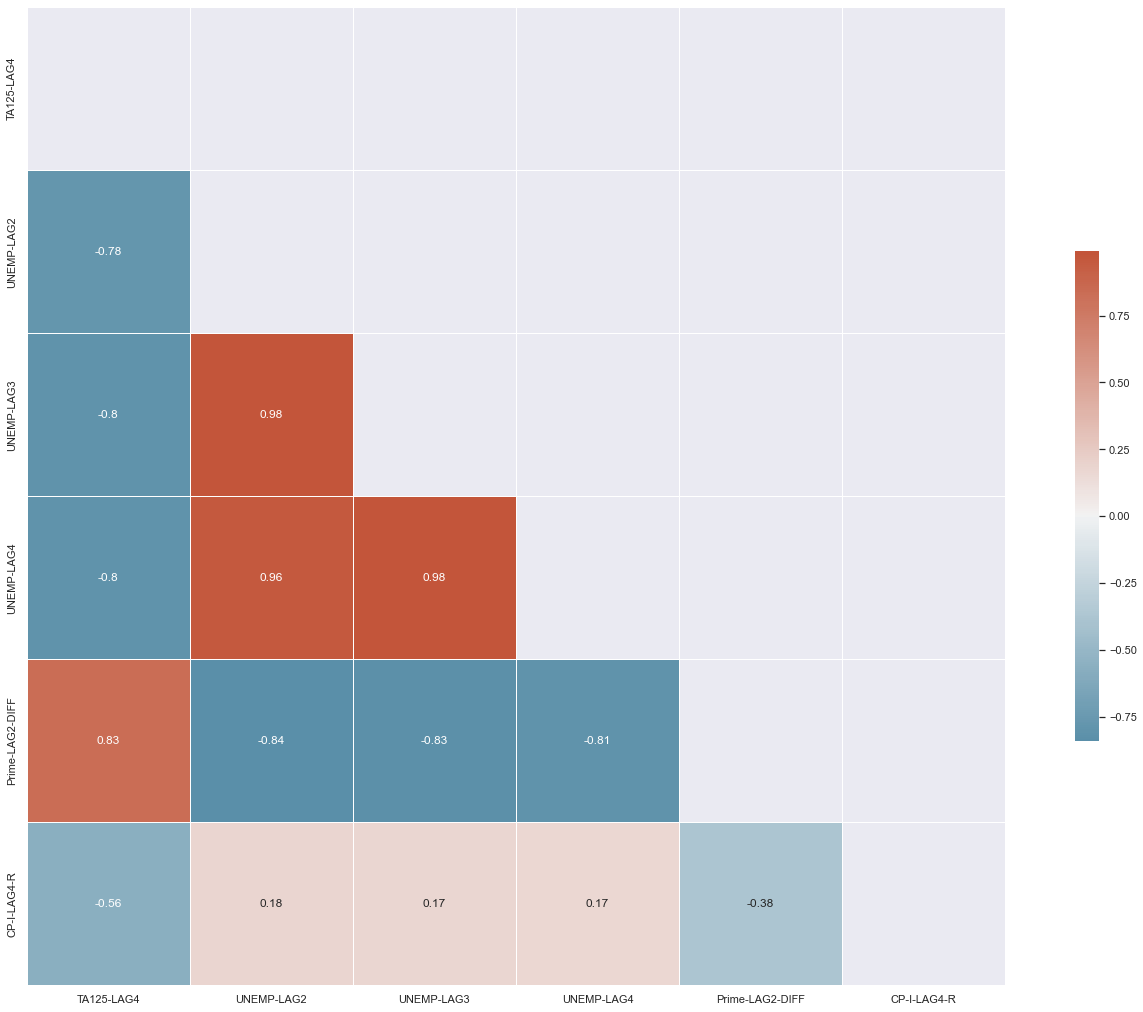

In [158]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# RECAP

As we can see the corr between variables is so hi.
Called multi correlation

In addition, UNEMP var showed 3 time, and it's not make sense.

The comments using the difference as variable in prime and unemployment accepted and improved our model.

# END

# Test the model

In [159]:
# add explanation - TO DO

In [160]:
from sklearn.model_selection import train_test_split
#10% for test
df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)


In [161]:
x = df_train[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF']]
y = df_train['PRIVATE-P-C-R']


In [162]:
x = sm.add_constant(x)

In [163]:
linear = sm.OLS(y, x)
result = linear.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     12.63
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           4.37e-05
Time:                        15:53:07   Log-Likelihood:                 145.85
No. Observations:                  27   AIC:                            -283.7
Df Residuals:                      23   BIC:                            -278.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0180      0.000     

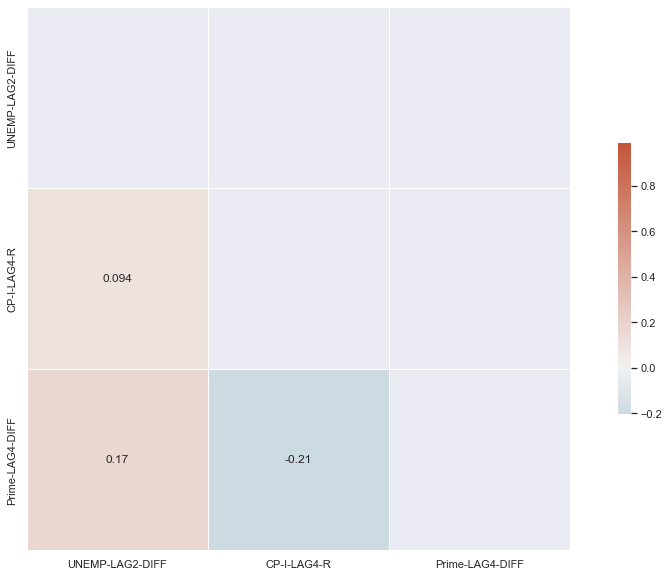

In [164]:
x1 = df_train[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF']]

corr = x1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(17, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [165]:
test = df_test[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF']]
test = sm.add_constant(test)
predict = pd.DataFrame()
predict["Real"] = df_test['PRIVATE-P-C-R'].astype(float)
predict["predict"] = result.predict(test)
predict["Gap"] = predict["Real"] - predict["predict"]
predict

,Real,predict,Gap
57,0.017268,0.016933,0.000335
83,0.017668,0.018469,-0.000801
68,0.015624,0.017181,-0.001557


In [166]:
print(predict["Gap"].mean())
print(predict["Gap"].std())

-0.000674362792794391
0.0009524144032627488


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


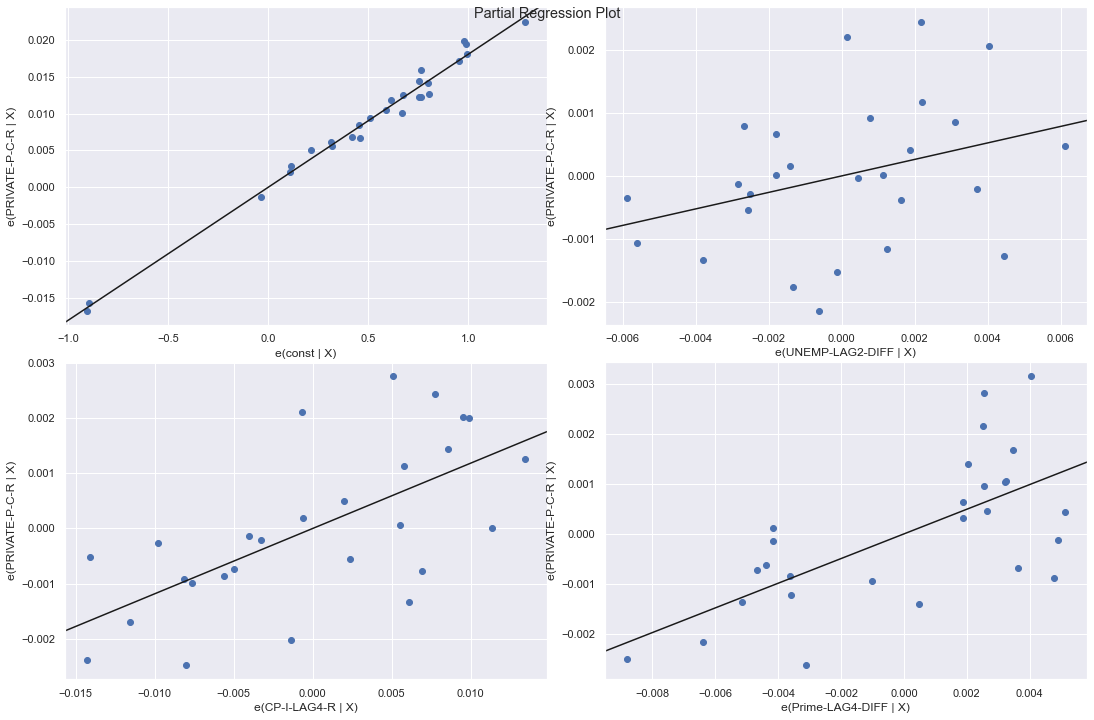

In [167]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=0.01)

In [168]:
display = df[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF']]
display = sm.add_constant(display)
show_point = pd.DataFrame()
show_point["Date"] = df["Index"]
show_point["Real"] = df['PRIVATE-P-C-R'].astype(float)
show_point["predict"] = result.predict(display)
show_point["Gap"] = show_point["Real"] - show_point["predict"]

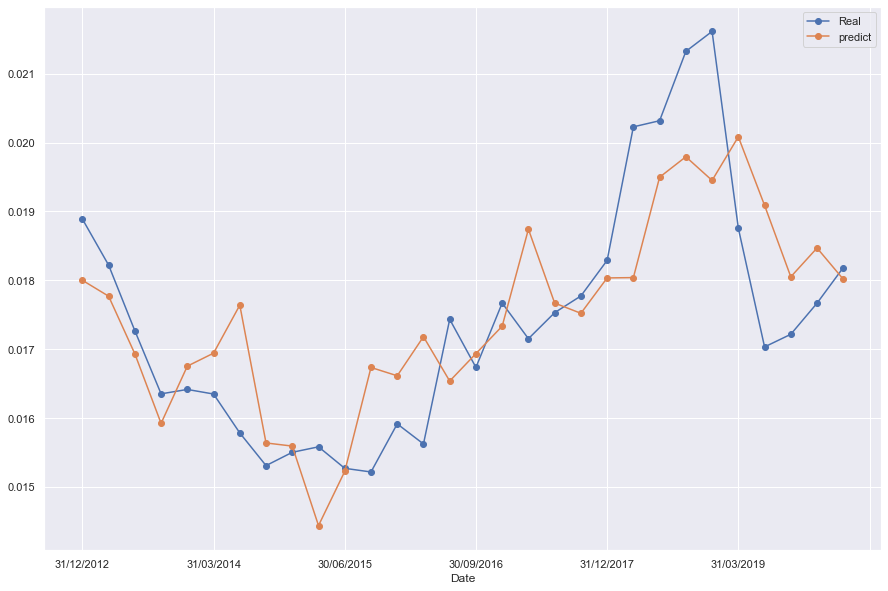

In [169]:
check1 = show_point.reset_index()
check1.plot(x="Date", y=["Real", "predict"], marker = "o")
plt.show()

# Test the model
Option 2 - Whit TA125-LAG4-R feature

In [170]:
x2 = ['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF','TA125-LAG4-R']
y2 = ['PRIVATE-P-C-R']
y2 = df[y2]
x2 = df[x2]
x2 = sm.add_constant(x2)
result3 = sm.OLS(y2, x2).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     10.09
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           5.27e-05
Time:                        15:53:10   Log-Likelihood:                 162.86
No. Observations:                  30   AIC:                            -315.7
Df Residuals:                      25   BIC:                            -308.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179      0.000     

In [171]:
from sklearn.model_selection import train_test_split
#10% for test
df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)


In [172]:
x = df_train[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF','TA125-LAG4-R']]
y = df_train['PRIVATE-P-C-R']


In [173]:
x = sm.add_constant(x)


In [174]:
linear = sm.OLS(y, x)
result = linear.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     9.947
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           9.43e-05
Time:                        15:53:10   Log-Likelihood:                 146.65
No. Observations:                  27   AIC:                            -283.3
Df Residuals:                      22   BIC:                            -276.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0181      0.000     

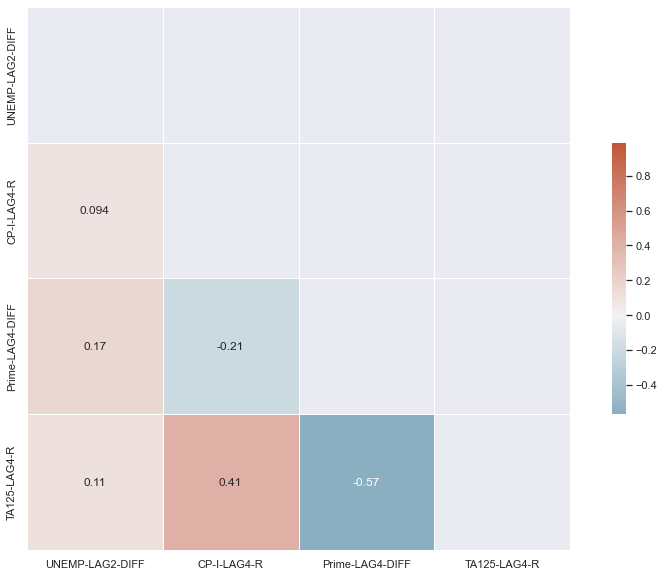

In [175]:
x1 = df_train[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF','TA125-LAG4-R']]


corr = x1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [176]:
test = df_test[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF','TA125-LAG4-R']]
test = sm.add_constant(test)
predict = pd.DataFrame()
predict["Real"] = df_test['PRIVATE-P-C-R'].astype(float)
predict["predict"] = result.predict(test)
predict["Gap"] = predict["Real"] - predict["predict"]
predict

,Real,predict,Gap
57,0.017268,0.017297,-0.000029
83,0.017668,0.017638,0.000030
68,0.015624,0.017753,-0.002128


In [177]:
print(predict["Gap"].mean())
print(predict["Gap"].std())

-0.0007092760318472251
0.0012294228079960507


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


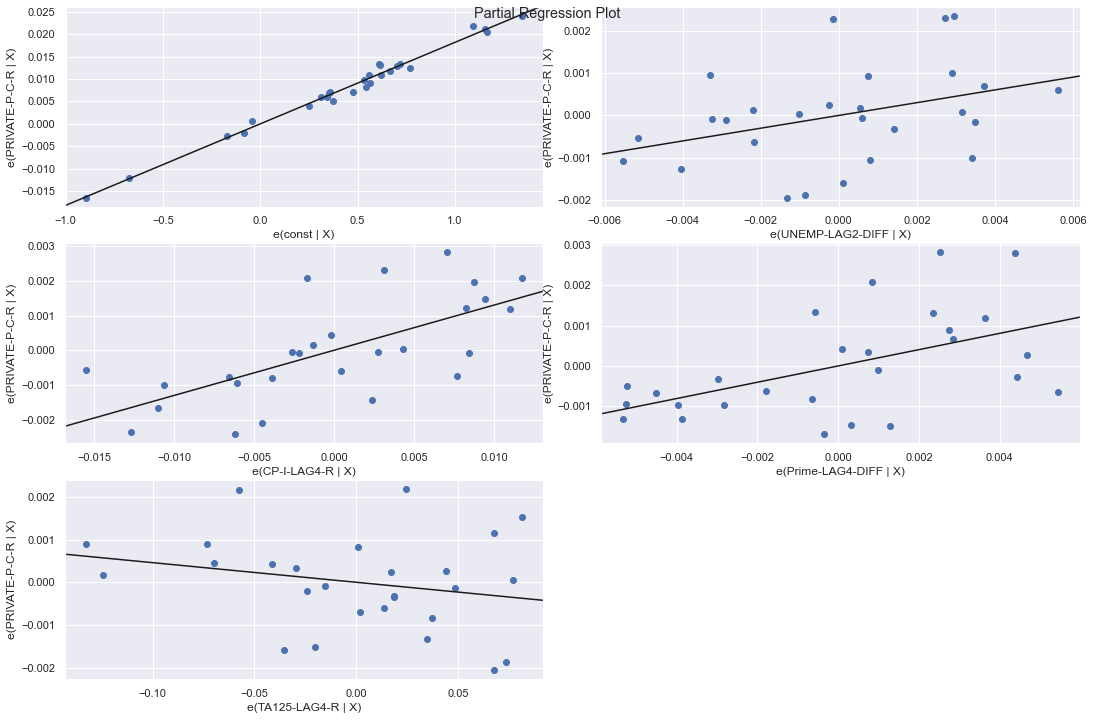

In [178]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=0.01)

In [179]:
display = df[['UNEMP-LAG2-DIFF','CP-I-LAG4-R','Prime-LAG4-DIFF','TA125-LAG4-R']]
display = sm.add_constant(display)
show_point = pd.DataFrame()
show_point["Date"] = df["Index"]
show_point["Real"] = df['PRIVATE-P-C-R'].astype(float)
show_point["predict"] = result.predict(display)
show_point["Gap"] = show_point["Real"] - show_point["predict"]

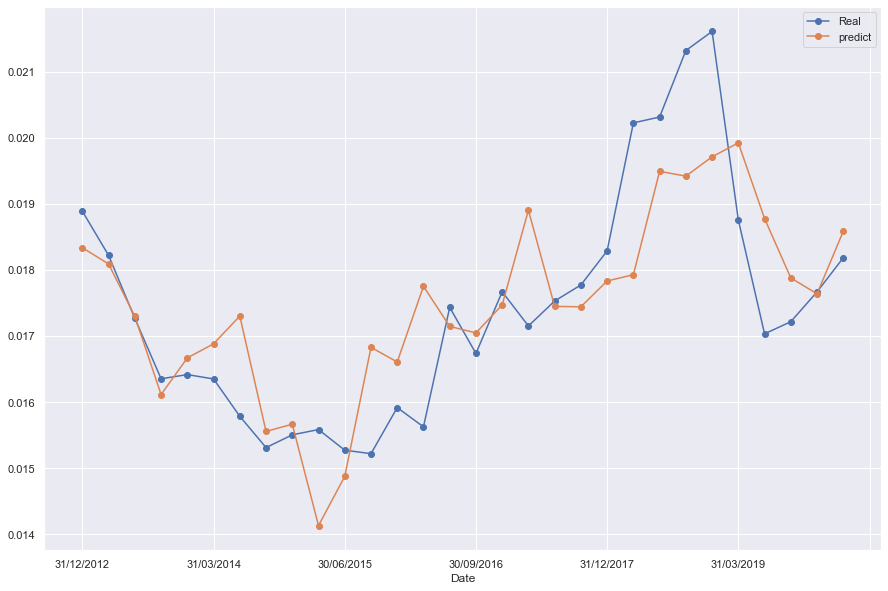

In [180]:
check1 = show_point.reset_index()
check1.plot(x="Date", y=["Real", "predict"], marker = "o")
plt.show()

# END

### Try to predict the diff of problem credit

In [181]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_private_sector_all_feature.csv')
df
# Cutting relevant rows
df = df[56:85]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
56,31/03/2013,Mar-13,1101.886111,0.0,0.048596,1100.04,1049.06,1054.58,969.86,1032.48,...,97.668555,97.110449,0.000246,0.000246,0.006914,0.012701,0.019109,0.012534,0.018221,-0.000669
57,30/06/2013,Jun-13,1094.010952,-1.0,-0.025990,1071.45,1100.04,1049.06,1054.58,969.86,...,98.784767,97.668555,0.012935,0.012935,0.008414,0.019939,0.019163,0.012197,0.017268,-0.000953
58,30/09/2013,Sep-13,1108.793750,0.0,0.066321,1142.51,1071.45,1100.04,1049.06,1054.58,...,98.319679,98.784767,0.004912,0.004912,0.018161,0.013367,0.019268,0.011826,0.016352,-0.000916
59,31/12/2013,Dec-13,1207.807826,0.0,0.057050,1207.69,1142.51,1071.45,1100.04,1049.06,...,98.343868,98.319679,0.000000,0.000000,0.017910,0.018161,0.018779,0.011686,0.016416,0.000064
60,31/03/2014,Mar-14,1273.445238,0.0,0.062218,1282.83,1207.69,1142.51,1071.45,1100.04,...,99.615978,98.343868,-0.004888,-0.004888,0.000000,0.012935,0.017496,0.011405,0.016349,-0.000067
61,30/06/2014,Jun-14,1260.286000,-1.0,-0.023292,1252.95,1282.83,1207.69,1142.51,1071.45,...,100.105251,99.615978,0.004912,0.004912,0.000000,0.004912,0.017934,0.011217,0.015784,-0.000565
62,30/09/2014,Sep-14,1291.975000,0.0,0.042332,1305.99,1252.95,1282.83,1207.69,1142.51,...,100.105251,100.105251,-0.002933,-0.002933,-0.002933,-0.002933,0.017205,0.011255,0.015310,-0.000474
63,31/12/2014,Dec-14,1304.893478,0.0,-0.013063,1288.93,1305.99,1252.95,1282.83,1207.69,...,99.615978,100.105251,0.000980,0.000980,0.002947,-0.001955,0.018194,0.015455,0.015503,0.000193
64,31/03/2015,Mar-15,1386.289048,0.0,0.099579,1417.28,1288.93,1305.99,1252.95,1282.83,...,100.105251,99.615978,-0.012968,-0.012968,-0.014897,-0.010059,0.017351,0.015314,0.015583,0.000080
65,30/06/2015,Jun-15,1452.349545,0.0,0.000727,1418.31,1417.28,1288.93,1305.99,1252.95,...,99.811687,100.105251,0.011134,0.011134,-0.001000,-0.003930,0.018446,0.015096,0.015271,-0.000312


In [182]:
df = df.drop(labels= ['PROVISION-b','PROVISION-p'], axis= 1)

In [183]:
df = df.drop(labels= ['PRIVATE-P-C-R'], axis= 1)

In [184]:
df.iloc[:, -1:]

,P-R-OF-C
56,-0.000669
57,-0.000953
58,-0.000916
59,0.000064
60,-0.000067
61,-0.000565
62,-0.000474
63,0.000193
64,0.000080
65,-0.000312


In [185]:
x = df.iloc[:, 2:-1]
y_provision = df.iloc[:, -1:]


In [186]:
x_columns = x.columns
x_columns

Index(['TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE', 'TA125-LAG1',
       'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R'],
      dtype='object')

In [187]:

x_columns = ['TA125', 'D3-125', 'TA-125-CLOSE',
             'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG1-R',
             'TA125-LAG2-R', 'UNEMP', 'UNEMP-LAG1',
             'UNEMP-LAG2', 'UNEMP-LAG1-DIFF',
             'UNEMP-LAG2-DIFF', 'GDP', 'GDP-LAG1',
             'GDP-LAG2', 'GDP-LAG1-R', 'GDP-LAG2-R',
             'Prime', 'Prime-LAG1', 'Prime-LAG2',
             'Prime-LAG1-DIFF', 'Prime-LAG2-DIFF',
             'CP-I', 'CP-I-LAG1', 'CP-I-LAG2',
             'CP-I-LAG1-R', 'CP-I-LAG2-R']

In [188]:
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.124
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.481
Time:                        15:53:13   Log-Likelihood:                 184.84
No. Observations:                  29   AIC:                            -323.7
Df Residuals:                       6   BIC:                            -292.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0144      0.073     

In [189]:
x_columns.remove('CP-I-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.124
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.481
Time:                        15:53:13   Log-Likelihood:                 184.84
No. Observations:                  29   AIC:                            -323.7
Df Residuals:                       6   BIC:                            -292.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0144      0.073     

In [190]:
x_columns.remove('CP-I-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1.374
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.349
Time:                        15:53:13   Log-Likelihood:                 184.84
No. Observations:                  29   AIC:                            -325.7
Df Residuals:                       7   BIC:                            -295.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0146      0.066     

In [191]:
x_columns.remove('UNEMP-LAG2-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1.374
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.349
Time:                        15:53:13   Log-Likelihood:                 184.84
No. Observations:                  29   AIC:                            -325.7
Df Residuals:                       7   BIC:                            -295.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0146      0.066     

In [192]:
x_columns.remove('TA-125-CLOSE')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     1.537
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.273
Time:                        15:53:13   Log-Likelihood:                 184.02
No. Observations:                  29   AIC:                            -326.0
Df Residuals:                       8   BIC:                            -297.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0296      0.059     

In [193]:
x_columns.remove('CP-I')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     1.688
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.212
Time:                        15:53:13   Log-Likelihood:                 183.16
No. Observations:                  29   AIC:                            -326.3
Df Residuals:                       9   BIC:                            -299.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0461      0.053     

In [194]:
x_columns.remove('GDP-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1.853
Date:                Mon, 09 Jan 2023   Prob (F-statistic):              0.160
Time:                        15:53:13   Log-Likelihood:                 182.42
No. Observations:                  29   AIC:                            -326.8
Df Residuals:                      10   BIC:                            -300.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0445      0.051     

In [195]:
x_columns.remove('GDP-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2.158
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0985
Time:                        15:53:14   Log-Likelihood:                 182.41
No. Observations:                  29   AIC:                            -328.8
Df Residuals:                      11   BIC:                            -304.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0442      0.049     

In [196]:
x_columns.remove('D3-125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2.376
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0674
Time:                        15:53:14   Log-Likelihood:                 181.85
No. Observations:                  29   AIC:                            -329.7
Df Residuals:                      12   BIC:                            -306.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0356      0.046     

In [197]:
x_columns.remove('Prime')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2.376
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0674
Time:                        15:53:14   Log-Likelihood:                 181.85
No. Observations:                  29   AIC:                            -329.7
Df Residuals:                      12   BIC:                            -306.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0356      0.046     

In [198]:
x_columns.remove('Prime-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2.376
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0674
Time:                        15:53:14   Log-Likelihood:                 181.85
No. Observations:                  29   AIC:                            -329.7
Df Residuals:                      12   BIC:                            -306.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0356      0.046     

In [199]:
x_columns.remove('Prime-LAG2-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2.700
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0398
Time:                        15:53:14   Log-Likelihood:                 181.66
No. Observations:                  29   AIC:                            -331.3
Df Residuals:                      13   BIC:                            -309.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0335      0.044     

In [200]:
x_columns.remove('CP-I-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2.528
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0469
Time:                        15:53:14   Log-Likelihood:                 179.43
No. Observations:                  29   AIC:                            -328.9
Df Residuals:                      14   BIC:                            -308.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0138      0.031     

In [201]:
x_columns.remove('Prime-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     2.547
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0431
Time:                        15:53:14   Log-Likelihood:                 178.05
No. Observations:                  29   AIC:                            -328.1
Df Residuals:                      15   BIC:                            -309.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0240      0.030     

In [202]:
x_columns.remove('Prime-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     2.821
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0276
Time:                        15:53:14   Log-Likelihood:                 177.63
No. Observations:                  29   AIC:                            -329.3
Df Residuals:                      16   BIC:                            -311.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0166      0.028     

In [203]:
x_columns.remove('UNEMP-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     2.821
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0276
Time:                        15:53:14   Log-Likelihood:                 177.63
No. Observations:                  29   AIC:                            -329.3
Df Residuals:                      16   BIC:                            -311.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0166      0.028      0.599   

In [204]:
x_columns.remove('UNEMP-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.200
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0155
Time:                        15:53:14   Log-Likelihood:                 177.41
No. Observations:                  29   AIC:                            -330.8
Df Residuals:                      17   BIC:                            -314.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0141      0.027      0.530   

In [205]:
x_columns.remove('TA125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     3.247
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0144
Time:                        15:53:14   Log-Likelihood:                 176.10
No. Observations:                  29   AIC:                            -330.2
Df Residuals:                      18   BIC:                            -315.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0313      0.023      1.349   

In [206]:
x_columns.remove('CP-I-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     3.622
Date:                Mon, 09 Jan 2023   Prob (F-statistic):            0.00873
Time:                        15:53:14   Log-Likelihood:                 175.63
No. Observations:                  29   AIC:                            -331.3
Df Residuals:                      19   BIC:                            -317.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0470      0.011      4.423   

In [207]:
x_columns.remove('TA125-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:               P-R-OF-C   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3.505
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0108
Time:                        15:53:14   Log-Likelihood:                 173.85
No. Observations:                  29   AIC:                            -329.7
Df Residuals:                      20   BIC:                            -317.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0423      0.011      4.002   

In [208]:
# NOT GOOD ENOUGH

In [209]:
display = df[['UNEMP-LAG2-DIFF', 'CP-I-LAG4-R', 'Prime-LAG4-DIFF', 'TA125-LAG4-R']]
display = sm.add_constant(display)
show_point = pd.DataFrame()
show_point["Date"] = df["Index"]
show_point["Real"] = df['PRIVATE-P-C-R'].astype(float)
show_point["predict"] = result.predict(display)
show_point["Gap"] = show_point["Real"] - show_point["predict"]
check1 = show_point.reset_index()
check1.plot(x="Date", y=["Real", "predict"], marker="o")
plt.show()

KeyError: 'PRIVATE-P-C-R'

In [210]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_private_sector_all_feature.csv')
# Cutting relevant rows
df = df[55:85]

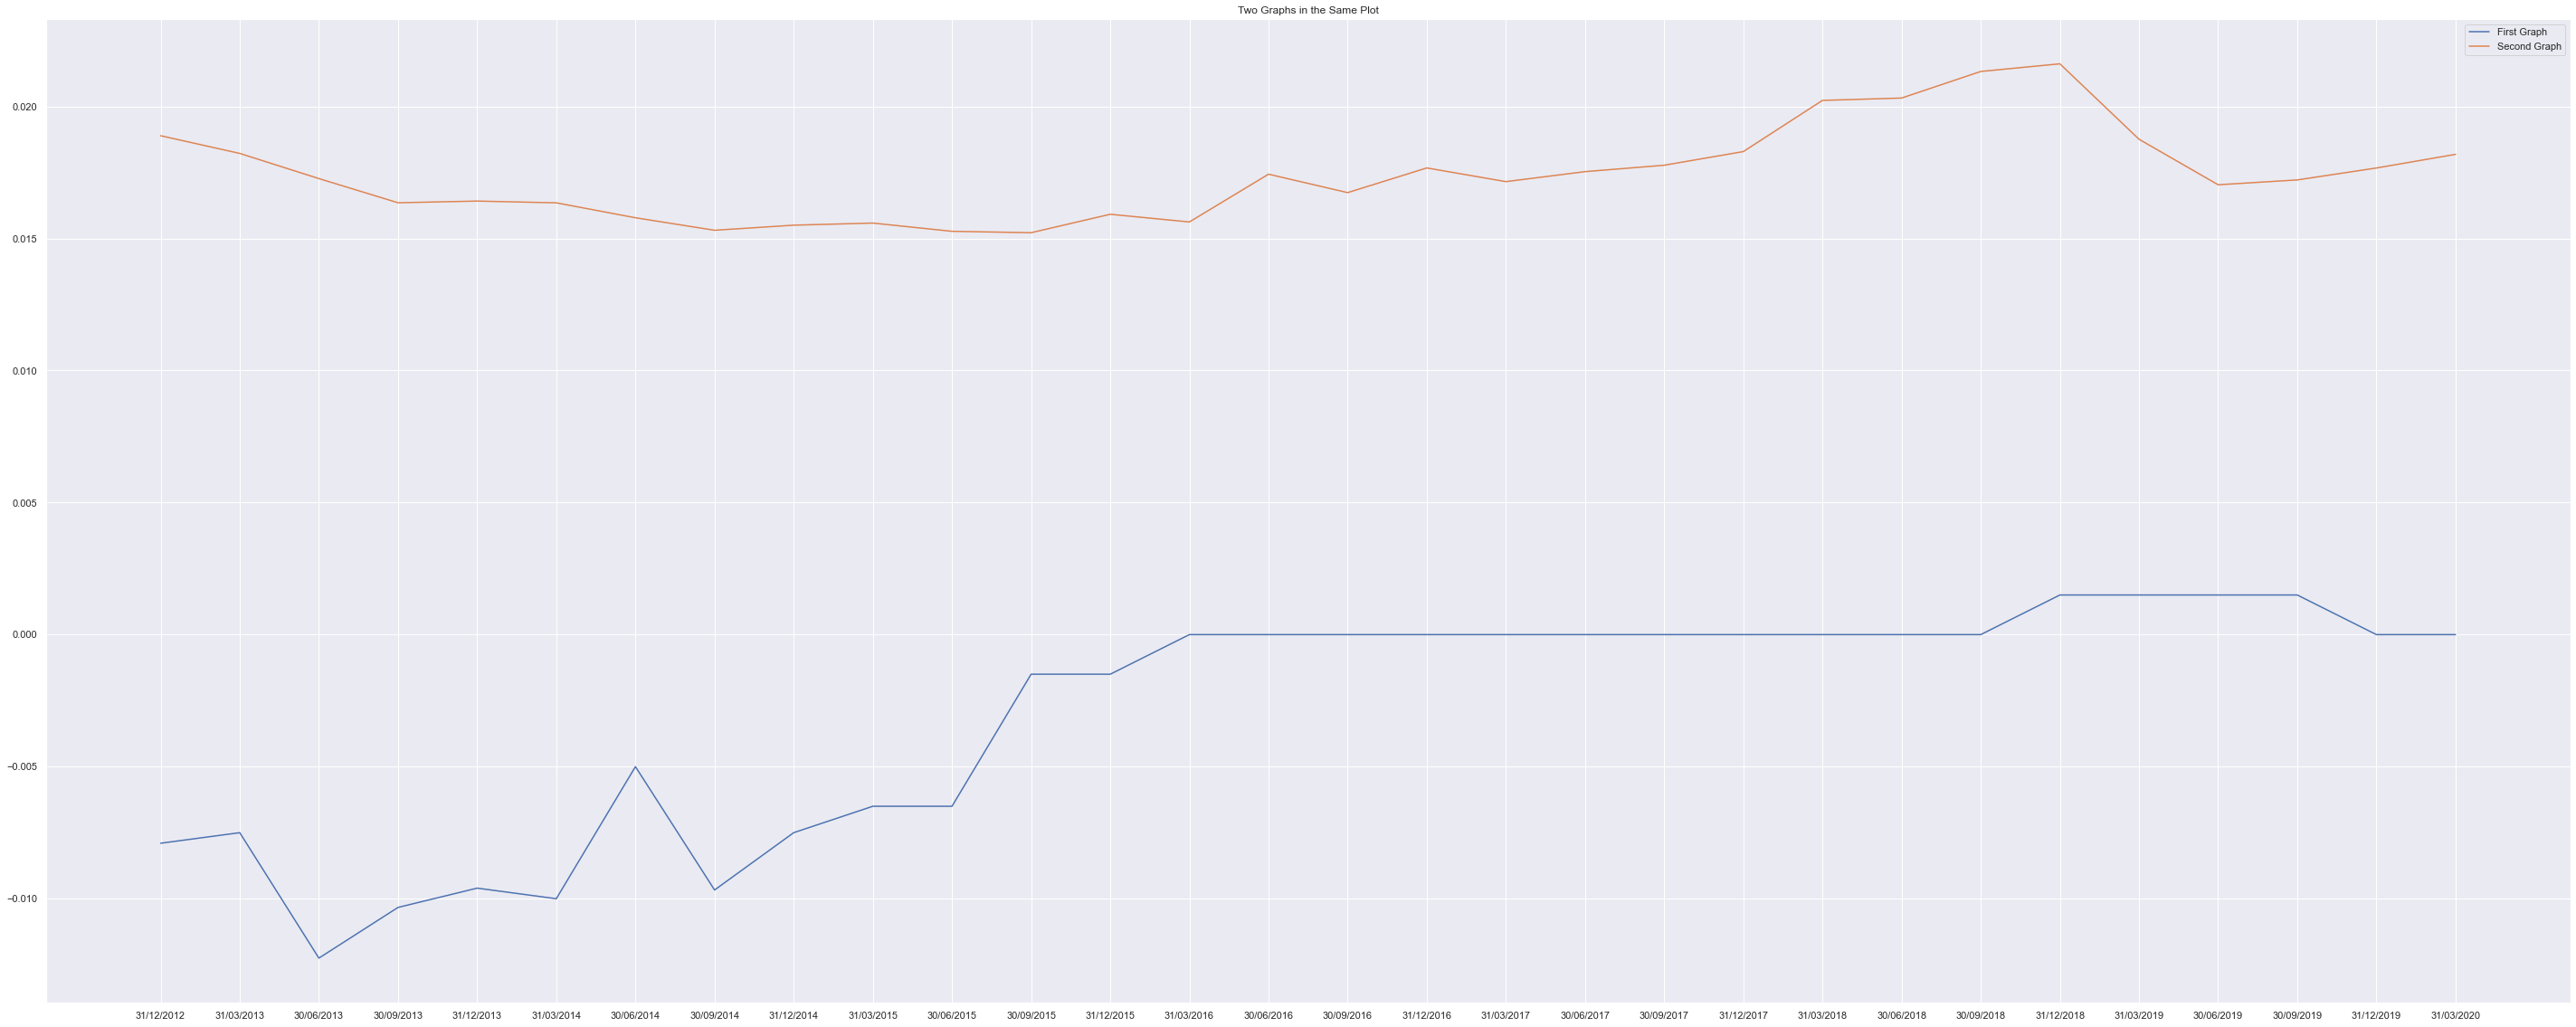

In [211]:
plt.rcParams["figure.figsize"]=50,20
# Data for first graph
y1 = df['Prime-LAG4-DIFF']
x1 = df["Index"]

# Data for second graph
y2 = df['PRIVATE-P-C-R']
x2 = df["Index"]

# Create the plot
plt.plot(x1, y1, label='First Graph')
plt.plot(x2, y2, label='Second Graph')

# Add a title
plt.title('Two Graphs in the Same Plot')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [235]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_private_sector_all_feature.csv')
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,TA125-LAG1-R,TA125-LAG2-R,TA125-LAG3-R,TA125-LAG4-R,UNEMP,UNEMP-LAG1,UNEMP-LAG2,UNEMP-LAG3,UNEMP-LAG4,UNEMP-LAG1-DIFF,UNEMP-LAG2-DIFF,UNEMP-LAG3-DIFF,UNEMP-LAG4-DIFF,GDP,GDP-LAG1,GDP-LAG2,GDP-LAG3,GDP-LAG4,GDP-LAG1-R,GDP-LAG2-R,GDP-LAG3-R,GDP-LAG4-R,Prime,Prime-LAG1,Prime-LAG2,Prime-LAG3,Prime-LAG4,Prime-LAG1-DIFF,Prime-LAG2-DIFF,Prime-LAG3-DIFF,Prime-LAG4-DIFF,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
0,31/03/1999,Mar-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159217.332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.335775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016927,NaN,NaN,NaN
1,30/06/1999,Jun-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111803,0.108081,NaN,NaN,NaN,0.003722,NaN,NaN,NaN,165705.991,159217.332,NaN,NaN,NaN,0.040753,NaN,NaN,NaN,0.1350,0.1450,NaN,NaN,NaN,-0.0100,NaN,NaN,NaN,74.113686,73.335775,NaN,NaN,NaN,0.010608,NaN,NaN,NaN,0.016161,NaN,NaN,NaN
2,30/09/1999,Sep-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110452,0.111803,0.108081,NaN,NaN,-0.001351,0.002371,NaN,NaN,166239.849,165705.991,159217.332,NaN,NaN,0.003222,0.044106,NaN,NaN,0.1300,0.1350,0.145,NaN,NaN,-0.0050,-0.0150,NaN,NaN,75.033035,74.113686,73.335775,NaN,NaN,0.012405,0.012405,NaN,NaN,0.015780,NaN,NaN,NaN
3,31/12/1999,Dec-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107801,0.110452,0.111803,0.108081,NaN,-0.002651,-0.004002,-0.000280,NaN,169127.826,166239.849,165705.991,159217.332,NaN,0.017372,0.020650,0.062245,NaN,0.1267,0.1300,0.135,0.145,NaN,-0.0033,-0.0083,-0.0183,NaN,75.386631,75.033035,74.113686,73.335775,NaN,0.004713,0.004713,0.027965,NaN,0.015710,0.016848,NaN,NaN
4,31/03/2000,03/00,NaN,NaN,NaN,516.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106791,0.107801,0.110452,0.111803,0.108081,-0.001010,-0.003661,-0.005012,-0.001290,172827.760,169127.826,166239.849,165705.991,159217.332,0.021877,0.039629,0.042978,0.085483,0.1138,0.1267,0.130,0.135,0.145,-0.0129,-0.0162,-0.0212,-0.0312,74.467282,75.386631,75.033035,74.113686,73.335775,-0.012195,-0.012195,0.004771,0.015429,0.015084,0.018150,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,30/06/2021,Jun-21,NaN,NaN,0.060400,1764.58,1664.07,1568.09,1345.44,1325.23,0.060400,0.125305,0.311526,0.331527,0.053197,0.050695,0.047367,0.047155,0.041763,0.002502,0.005830,0.006042,0.011434,367956.235,354159.037,354280.959,346364.877,318803.221,0.038958,0.038600,0.062337,0.154180,0.0160,0.0160,0.016,0.016,0.016,0.0000,0.0000,0.0000,0.0000,101.400000,100.600000,99.800596,99.800596,99.700895,0.007952,0.007952,0.016026,0.017042,0.019770,0.018785,0.016208,-0.001034
90,30/09/2021,Sep-21,NaN,NaN,0.053894,1859.68,1764.58,1664.07,1568.09,1345.44,0.053894,0.117549,0.185952,0.382210,0.049975,0.053197,0.050695,0.047367,0.047155,-0.003222,-0.000720,0.002608,0.002820,374441.672,367956.235,354159.037,354280.959,346364.877,0.017626,0.057270,0.056906,0.081061,0.0160,0.0160,0.016,0.016,0.016,0.0000,0.0000,0.0000,0.0000,102.300000,101.400000,100.600000,99.800596,99.800596,0.008876,0.008876,0.025044,0.025044,0.017995,0.017661,0.015806,-0.000402
91,31/12/2021,Dec-21,NaN,NaN,0.105841,2056.51,1859.68,1764.58,1664.07,1568.09,0.105841,0.165439,0.235831,0.311474,0.044192,0.049975,0.053197,0.050695,0.047367,-0.005783,-0.009005,-0.006503,-0.003175,391589.099,374441.672,367956.235,354159.037,354280.959,0.045795,0.064227,0.105687,0.105307,0.0160,0.0160,0.016,0.016,0.016,0.0000,0.0000,0.0000,0.0000,102.600000,102.300000,101.400000,100.600000,99.800596,0.002933,0.002933,0.019881,0.028050,0.016683,0.016957,0.015577,-0.000229
92,31/03/2022,Mar-22,NaN,NaN,0.019742,2097.11,2056.51,1859.68,1764.58,1

In [236]:
df = df[80:-1]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,TA125-LAG1-R,TA125-LAG2-R,TA125-LAG3-R,TA125-LAG4-R,UNEMP,UNEMP-LAG1,UNEMP-LAG2,UNEMP-LAG3,UNEMP-LAG4,UNEMP-LAG1-DIFF,UNEMP-LAG2-DIFF,UNEMP-LAG3-DIFF,UNEMP-LAG4-DIFF,GDP,GDP-LAG1,GDP-LAG2,GDP-LAG3,GDP-LAG4,GDP-LAG1-R,GDP-LAG2-R,GDP-LAG3-R,GDP-LAG4-R,Prime,Prime-LAG1,Prime-LAG2,Prime-LAG3,Prime-LAG4,Prime-LAG1-DIFF,Prime-LAG2-DIFF,Prime-LAG3-DIFF,Prime-LAG4-DIFF,CP-I,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,PROVISION-p,PRIVATE-P-C-R,P-R-OF-C
80,31/03/2019,Mar-19,1417.974000,0.0,0.063645,1418.03,1333.18,1484.82,1362.60,1310.48,0.063645,-0.044982,0.040680,0.082069,0.041153,0.040775,0.040923,0.039909,0.038215,0.000378,0.000230,0.001244,0.002938,344923.483,339111.622,336365.050,333428.281,332756.341,0.017138,0.025444,0.034476,0.036565,0.0175,0.0175,0.0160,0.0160,0.0160,0.0000,0.0015,0.0015,0.0015,100.398801,99.898324,100.194465,99.997037,99.009900,0.005010,0.005010,0.004018,0.014028,0.014118,0.018299,0.018757,-0.002856
81,30/06/2019,Jun-19,1447.851500,0.0,0.047340,1485.16,1418.03,1333.18,1484.82,1362.60,0.047340,0.113998,0.000229,0.089946,0.038845,0.041153,0.040775,0.040923,0.039909,-0.002308,-0.001930,-0.002078,-0.001064,346318.504,344923.483,339111.622,336365.050,333428.281,0.004044,0.021252,0.029591,0.038660,0.0175,0.0175,0.0175,0.0160,0.0160,0.0000,0.0000,0.0015,0.0015,100.797605,100.398801,99.898324,100.194465,99.997037,0.003972,0.003972,0.006020,0.008006,0.014947,0.017195,0.017033,-0.001724
82,30/09/2019,Sep-19,1505.308421,0.0,0.031916,1532.56,1485.16,1418.03,1333.18,1484.82,0.031916,0.080767,0.149552,0.032152,0.035788,0.038845,0.041153,0.040775,0.040923,-0.003057,-0.005365,-0.004987,-0.005135,350349.153,346318.504,344923.483,339111.622,336365.050,0.011639,0.015730,0.033138,0.041574,0.0175,0.0175,0.0175,0.0175,0.0160,0.0000,0.0000,0.0000,0.0015,100.498502,100.797605,100.398801,99.898324,100.194465,-0.002967,-0.002967,0.006008,0.003034,0.014715,0.017293,0.017216,0.000183
83,31/12/2019,Dec-19,1612.222174,0.0,0.054902,1616.70,1532.56,1485.16,1418.03,1333.18,0.054902,0.088570,0.140103,0.212664,0.036817,0.035788,0.038845,0.041153,0.040775,0.001029,-0.002028,-0.004336,-0.003958,353335.563,350349.153,346318.504,344923.483,339111.622,0.008524,0.020262,0.024388,0.041945,0.0175,0.0175,0.0175,0.0175,0.0175,0.0000,0.0000,0.0000,0.0000,100.498502,100.498502,100.797605,100.398801,99.898324,0.000000,0.000000,0.000993,0.006008,0.016276,0.017510,0.017668,0.000452
84,31/03/2020,Mar-20,1270.834762,-21.0,-0.210194,1276.88,1616.70,1532.56,1485.16,1418.03,-0.210194,-0.166832,-0.140241,-0.099540,0.035723,0.036817,0.035788,0.038845,0.041153,-0.001094,-0.000065,-0.003122,-0.005430,349170.514,353335.563,350349.153,346318.504,344923.483,-0.011788,-0.003364,0.008235,0.012313,0.0175,0.0175,0.0175,0.0175,0.0175,0.0000,0.0000,0.0000,0.0000,100.398801,100.498502,100.498502,100.797605,100.398801,-0.000992,-0.000992,-0.003956,0.000000,0.019475,0.019849,0.018185,0.000517
85,30/06/2020,Jun-20,NaN,NaN,0.037866,1325.23,1276.88,1616.70,1532.56,1485.16,0.037866,-0.180287,-0.135283,-0.107685,0.041763,0.035723,0.036817,0.035788,0.038845,0.006040,0.004946,0.005975,0.002918,318803.221,349170.514,353335.563,350349.153,346318.504,-0.086970,-0.097732,-0.090041,-0.079451,0.0160,0.0175,0.0175,0.0175,0.0175,-0.0015,-0.0015,-0.0015,-0.0015,99.700895,100.398801,100.498502,100.498502,100.797605,-0.006951,-0.006951,-0.007937,-0.010880,0.021956,0.022533,0.018287,0.000102
86,30/09/2020,Sep-20,NaN,NaN,0.015250,1345.44,1325.23,1276.88,1616.70,1532.56,0.015250,0.053693,-0.167786,-0.122096,0.047155,0.041763,0.035723,0.036817,0.035788,0.005392,0.011432,0.010338,0.011367,346364.877,318803.221,349170.514,353335.563,350349.153,0.086454,-0.008035,-0.019728,-0.011372,0.0160,0.0160,0.0175,0.0175,0.0175,0.0000,-0.0015,-0.0015,-0.0015,99.800596,99.700895,100.398801,100.498502,100.498502,0.001000,0.001000,-0.006944,-0.006944,0.023710,0.02279

In [237]:
df[x_columns]

,UNEMP-LAG2-DIFF,CP-I-LAG4-R,Prime-LAG4-DIFF
80,0.000230,0.014028,0.0015
81,-0.001930,0.008006,0.0015
82,-0.005365,0.003034,0.0015
83,-0.002028,0.006008,0.0000
84,-0.000065,0.000000,0.0000
85,0.004946,-0.010880,-0.0015
86,0.011432,-0.006944,-0.0015
87,0.005604,-0.006944,-0.0015
88,0.003540,0.002004,-0.0015
89,0.005830,0.017042,0.0000


In [238]:
x_columns= ['UNEMP-LAG2-DIFF', 'CP-I-LAG4-R', 'Prime-LAG4-DIFF']

y = df[['PRIVATE-P-C-R']]

In [239]:
x = df[x_columns]
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PRIVATE-P-C-R   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     13.63
Date:                Mon, 09 Jan 2023   Prob (F-statistic):            0.00108
Time:                        15:59:30   Log-Likelihood:                 78.667
No. Observations:                  13   AIC:                            -149.3
Df Residuals:                       9   BIC:                            -147.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0179      0.000     

In [242]:
x

,UNEMP-LAG2-DIFF,CP-I-LAG4-R,Prime-LAG4-DIFF
80,0.000230,0.014028,0.0015
81,-0.001930,0.008006,0.0015
82,-0.005365,0.003034,0.0015
83,-0.002028,0.006008,0.0000
84,-0.000065,0.000000,0.0000
85,0.004946,-0.010880,-0.0015
86,0.011432,-0.006944,-0.0015
87,0.005604,-0.006944,-0.0015
88,0.003540,0.002004,-0.0015
89,0.005830,0.017042,0.0000


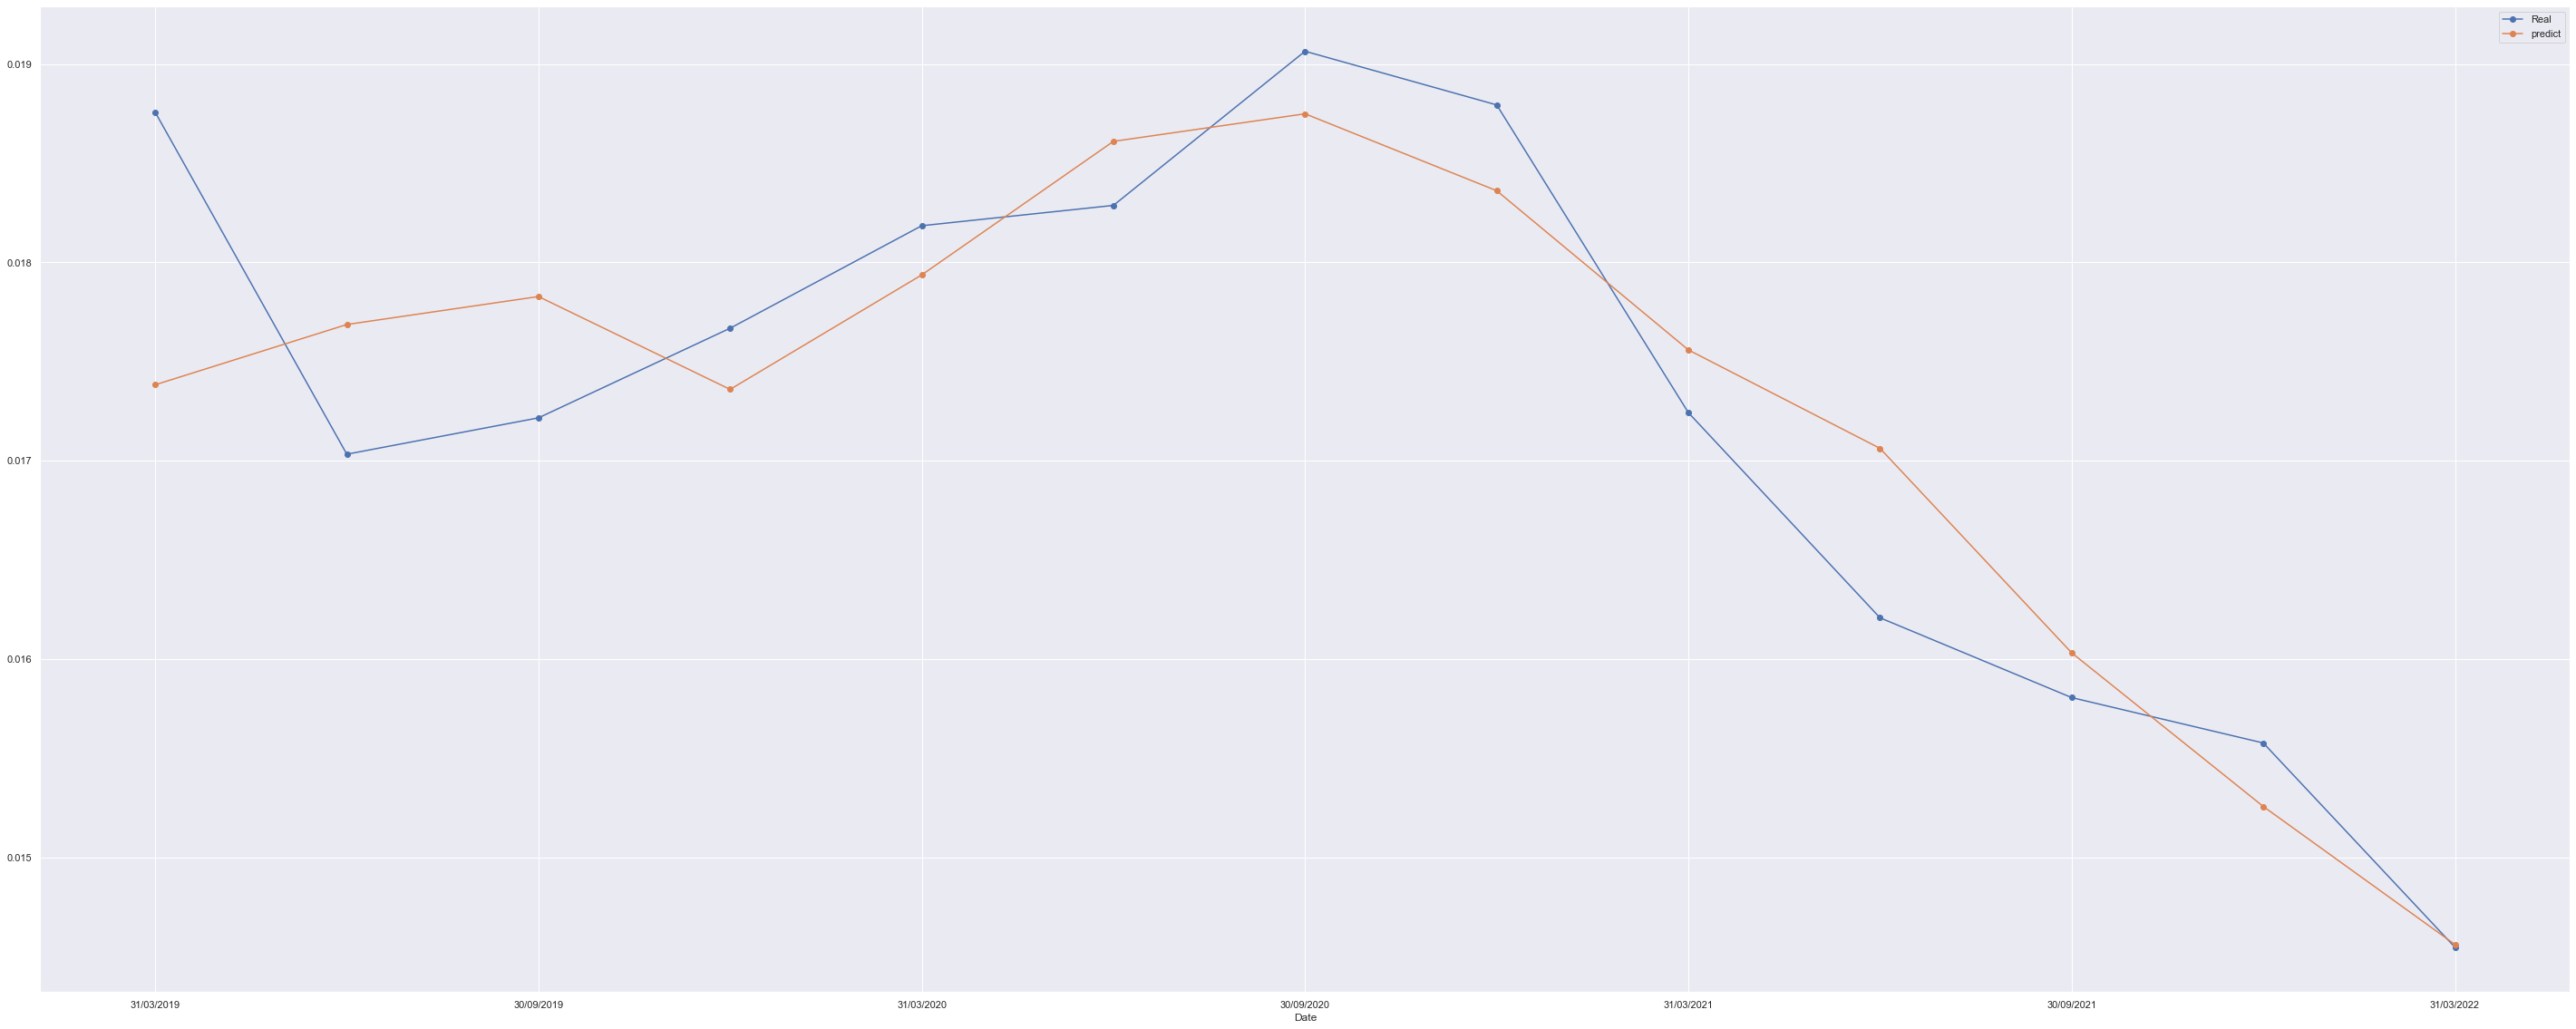

In [245]:
display = df[x_columns]
display = sm.add_constant(display)
show_point = pd.DataFrame()
show_point["Date"] = df["Index"]
show_point["Real"] = df["PRIVATE-P-C-R"].astype(float)
show_point["predict"] = result.predict(display)
show_point["Gap"] = show_point["Real"] - show_point["predict"]

check1 = show_point.reset_index()
check1.plot(x="Date", y=["Real", "predict"], marker="o")
plt.show()